# Predicting Memorability using features like HMP, LBP, Aesthetics and C3D





Import all the necessary packages

In [ ]:
import pandas as pd
import pickle
import numpy as np
from string import punctuation
from collections import Counter
import matplotlib.pyplot as plt
from numpy import arange
from pandas import read_csv
from google.colab import drive
import os
from math import sqrt

from tensorflow.python.keras import Sequential
from tensorflow.python.keras import layers
from tensorflow.python.keras import regularizers
from tensorflow.python.keras.preprocessing.text import Tokenizer

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import RepeatedKFold
from sklearn.linear_model import ElasticNet
from sklearn.metrics import mean_squared_error

In [ ]:
# for reproducability
from numpy.random import seed
seed(1)
import tensorflow
tensorflow.random.set_seed(1)

Get_score() - This function returns Spearman score

In [ ]:
def Get_score(Y_pred,Y_true):
    '''Calculate the Spearman's correlation coefficient'''
    Y_pred = np.squeeze(Y_pred)
    Y_true = np.squeeze(Y_true)
    if Y_pred.shape != Y_true.shape:
        print('Input shapes don\'t match!')
    else:
        if len(Y_pred.shape) == 1:
            Res = pd.DataFrame({'Y_true':Y_true,'Y_pred':Y_pred})
            score_mat = Res[['Y_true','Y_pred']].corr(method='spearman',min_periods=1)
            print('The Spearman\'s correlation coefficient is: %.3f' % score_mat.iloc[1][0])
        else:
            for ii in range(Y_pred.shape[1]):
                Get_score(Y_pred[:,ii],Y_true[:,ii])

X_seq() - This function returns an array of features extracted from the input, which is dataframe.

In [ ]:
def define_x_seq(df ,max_len, column_name, array_size):
  X_seq = np.zeros((len(df[column_name]),max_len))
  for i in range(len(df[column_name])):
      n = array_size
      if n==0:
          print(i)
      else:
          X_seq[i,-n:] = df.loc[i,column_name]
  X_seq.shape
  return X_seq


Split_data() - This function split feaures into training and testing dataset in the ratio of 80 : 20 respectively

In [ ]:
def Split_data(X_seq):  
  Y = labels[['short-term_memorability','long-term_memorability']].values # targets
  X = X_seq # sequences
  X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.2, random_state=42) # random state for reproducability
  return X_train, X_test, Y_train, Y_test

Loading the data from Google Drive.

In [ ]:
drive.mount('/content/drive/')
os.chdir('/content/drive/My Drive/CA684_Assignment')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


Install pyprind and tqdm to show progress bar whenever required

In [ ]:
!pip install pyprind
import pyprind

Load the ground truth values


In [ ]:
label_path = './Dev-set/Ground-truth/'
labels=pd.read_csv(label_path+'ground-truth.csv')

# 1> Best Performing Models - trained on training set (4800 dataset) and evaluated on validation set (1200 dataset)

## 1.1 Long-term Memorability

### 1.1.1 Loading Data - Aesthetic Features

read_aesthetic_features() - reads aesthetic feature files from Google drive

In [ ]:
os.chdir('/content/drive/My Drive/CA684 - Machine Learning Assignment/dev-set_aesthetic-features/features/aesthetic_visual_features')

# Read Aesthetic mean and median feature files
def read_aesthetic_features(fname):
    """Scan vectors from file""" 
    if os.path.exists(fname):
      with open(fname) as f:
          for line in f:
              aes =[float(item) for item in line.split(',')] # convert to float type, using default separator
      return aes
    else:
      return np.zeros(109)

Read aesthetic files one by one and store them in a dataframe

In [ ]:
df_aes = pd.DataFrame(columns=['video','AES-mean','AES-median'])

pbar = pyprind.ProgBar(len(labels['video']), title='Loading Aesthetic files')

# load the Aesthetic files
for i, video in enumerate(labels['video']):
    df_aes.loc[i,'video'] = video   
    df_aes.loc[i,'AES-mean'] = read_aesthetic_features('./aesthetic_feat_dev-set_mean/' + (video.split('.')[0]) + '.txt')
    df_aes.loc[i,'AES-median'] = read_aesthetic_features('./aesthetic_feat_dev-set_median/' + (video.split('.')[0]) + '.txt')
    print(video)
    pbar.update()

df_aes.head()

Loading Aesthetic files


video3.webm
video4.webm
video6.webm
video8.webm
video10.webm
video12.webm
video13.webm
video16.webm
video17.webm
video18.webm
video19.webm
video20.webm
video21.webm
video22.webm
video23.webm
video25.webm
video26.webm
video27.webm
video28.webm
video29.webm
video30.webm
video31.webm
video32.webm
video33.webm
video34.webm
video35.webm
video36.webm
video37.webm
video38.webm
video39.webm
video40.webm
video41.webm
video43.webm
video44.webm
video45.webm
video46.webm
video47.webm
video48.webm
video49.webm
video51.webm
video52.webm
video53.webm
video54.webm
video55.webm
video56.webm
video57.webm
video58.webm
video60.webm
video61.webm
video62.webm
video63.webm
video65.webm
video66.webm
video67.webm
video68.webm
video69.webm
video72.webm
video73.webm
video74.webm
video75.webm
video76.webm
video77.webm
video78.webm
video79.webm
video80.webm
video81.webm
video82.webm
video83.webm
video84.webm
video85.webm
video86.webm
video87.webm
video88.webm
video89.webm
video90.webm
video92.webm
video93.webm
vid

0% [#                             ] 100% | ETA: 00:43:30

video251.webm
video253.webm
video254.webm
video255.webm
video256.webm
video257.webm
video258.webm
video259.webm
video260.webm
video261.webm
video265.webm
video267.webm
video269.webm
video271.webm
video272.webm
video273.webm
video274.webm
video275.webm
video276.webm
video277.webm
video278.webm
video279.webm
video280.webm
video281.webm
video282.webm
video283.webm
video284.webm
video287.webm
video288.webm
video290.webm
video291.webm
video292.webm
video293.webm
video294.webm
video295.webm
video296.webm
video297.webm
video298.webm
video299.webm
video300.webm
video301.webm
video302.webm
video303.webm
video304.webm
video305.webm
video306.webm
video308.webm
video310.webm
video311.webm
video313.webm
video315.webm
video316.webm
video317.webm
video318.webm
video319.webm
video321.webm
video322.webm
video323.webm
video324.webm
video325.webm
video326.webm
video327.webm
video329.webm
video330.webm
video331.webm
video332.webm
video333.webm
video334.webm
video335.webm
video336.webm
video338.webm
video3

0% [##                            ] 100% | ETA: 01:03:21

video499.webm
video500.webm
video501.webm
video502.webm
video503.webm
video504.webm
video505.webm
video506.webm
video508.webm
video509.webm
video510.webm
video511.webm
video512.webm
video513.webm
video515.webm
video516.webm
video517.webm
video518.webm
video519.webm
video521.webm
video522.webm
video524.webm
video525.webm
video529.webm
video530.webm
video531.webm
video532.webm
video533.webm
video534.webm
video535.webm
video536.webm
video537.webm
video538.webm
video539.webm
video540.webm
video541.webm
video542.webm
video543.webm
video544.webm
video545.webm
video546.webm
video547.webm
video548.webm
video549.webm
video550.webm
video552.webm
video553.webm
video554.webm
video555.webm
video556.webm
video557.webm
video558.webm
video559.webm
video560.webm
video561.webm
video562.webm
video563.webm
video564.webm
video565.webm
video566.webm
video567.webm
video568.webm
video569.webm
video571.webm
video573.webm
video574.webm
video576.webm
video577.webm
video578.webm
video579.webm
video580.webm
video5

0% [###                           ] 100% | ETA: 01:07:29

video737.webm
video738.webm
video740.webm
video741.webm
video742.webm
video743.webm
video744.webm
video745.webm
video746.webm
video747.webm
video749.webm
video750.webm
video751.webm
video752.webm
video753.webm
video754.webm
video755.webm
video757.webm
video758.webm
video759.webm
video760.webm
video761.webm
video762.webm
video763.webm
video764.webm
video765.webm
video767.webm
video769.webm
video770.webm
video771.webm
video773.webm
video775.webm
video776.webm
video777.webm
video778.webm
video779.webm
video781.webm
video782.webm
video783.webm
video785.webm
video786.webm
video787.webm
video788.webm
video789.webm
video790.webm
video791.webm
video792.webm
video793.webm
video794.webm
video795.webm
video796.webm
video797.webm
video798.webm
video799.webm
video800.webm
video801.webm
video803.webm
video805.webm
video806.webm
video807.webm
video808.webm
video809.webm
video811.webm
video812.webm
video813.webm
video814.webm
video816.webm
video817.webm
video818.webm
video819.webm
video820.webm
video8

0% [####                          ] 100% | ETA: 01:07:32

video988.webm
video990.webm
video991.webm
video992.webm
video993.webm
video994.webm
video995.webm
video997.webm
video998.webm
video999.webm
video1001.webm
video1003.webm
video1004.webm
video1005.webm
video1006.webm
video1007.webm
video1009.webm
video1012.webm
video1014.webm
video1015.webm
video1017.webm
video1019.webm
video1020.webm
video1021.webm
video1022.webm
video1023.webm
video1024.webm
video1025.webm
video1027.webm
video1028.webm
video1030.webm
video1031.webm
video1032.webm
video1033.webm
video1035.webm
video1036.webm
video1038.webm
video1039.webm
video1040.webm
video1041.webm
video1042.webm
video1043.webm
video1044.webm
video1045.webm
video1046.webm
video1047.webm
video1048.webm
video1049.webm
video1050.webm
video1051.webm
video1052.webm
video1053.webm
video1054.webm
video1055.webm
video1056.webm
video1057.webm
video1060.webm
video1061.webm
video1063.webm
video1064.webm
video1065.webm
video1066.webm
video1067.webm
video1069.webm
video1070.webm
video1071.webm
video1073.webm
video

0% [#####                         ] 100% | ETA: 01:06:42

video1239.webm
video1241.webm
video1242.webm
video1243.webm
video1244.webm
video1245.webm
video1246.webm
video1247.webm
video1249.webm
video1250.webm
video1251.webm
video1253.webm
video1254.webm
video1255.webm
video1256.webm
video1257.webm
video1258.webm
video1259.webm
video1260.webm
video1261.webm
video1263.webm
video1264.webm
video1265.webm
video1266.webm
video1267.webm
video1270.webm
video1272.webm
video1273.webm
video1274.webm
video1275.webm
video1277.webm
video1278.webm
video1280.webm
video1281.webm
video1282.webm
video1283.webm
video1284.webm
video1285.webm
video1286.webm
video1288.webm
video1289.webm
video1290.webm
video1291.webm
video1293.webm
video1294.webm
video1295.webm
video1296.webm
video1297.webm
video1298.webm
video1299.webm
video1300.webm
video1301.webm
video1305.webm
video1307.webm
video1309.webm
video1310.webm
video1311.webm
video1312.webm
video1315.webm
video1317.webm
video1319.webm
video1321.webm
video1322.webm
video1324.webm
video1325.webm
video1328.webm
video1329.

0% [######                        ] 100% | ETA: 01:05:01

video1492.webm
video1493.webm
video1494.webm
video1496.webm
video1497.webm
video1498.webm
video1499.webm
video1502.webm
video1503.webm
video1504.webm
video1505.webm
video1506.webm
video1507.webm
video1508.webm
video1509.webm
video1510.webm
video1511.webm
video1513.webm
video1514.webm
video1515.webm
video1516.webm
video1517.webm
video1518.webm
video1519.webm
video1522.webm
video1524.webm
video1525.webm
video1526.webm
video1527.webm
video1528.webm
video1529.webm
video1530.webm
video1531.webm
video1533.webm
video1534.webm
video1535.webm
video1536.webm
video1537.webm
video1538.webm
video1539.webm
video1540.webm
video1541.webm
video1542.webm
video1543.webm
video1544.webm
video1546.webm
video1547.webm
video1548.webm
video1549.webm
video1550.webm
video1551.webm
video1553.webm
video1554.webm
video1555.webm
video1556.webm
video1558.webm
video1559.webm
video1560.webm
video1561.webm
video1562.webm
video1563.webm
video1564.webm
video1565.webm
video1569.webm
video1570.webm
video1571.webm
video1572.

0% [#######                       ] 100% | ETA: 01:02:55

video1741.webm
video1742.webm
video1743.webm
video1744.webm
video1745.webm
video1746.webm
video1747.webm
video1748.webm
video1749.webm
video1750.webm
video1751.webm
video1753.webm
video1755.webm
video1756.webm
video1757.webm
video1758.webm
video1759.webm
video1760.webm
video1761.webm
video1762.webm
video1763.webm
video1764.webm
video1765.webm
video1766.webm
video1767.webm
video1768.webm
video1769.webm
video1770.webm
video1771.webm
video1772.webm
video1774.webm
video1777.webm
video1778.webm
video1779.webm
video1780.webm
video1781.webm
video1782.webm
video1784.webm
video1785.webm
video1786.webm
video1789.webm
video1790.webm
video1793.webm
video1794.webm
video1795.webm
video1797.webm
video1799.webm
video1800.webm
video1801.webm
video1802.webm
video1803.webm
video1804.webm
video1805.webm
video1806.webm
video1807.webm
video1809.webm
video1810.webm
video1811.webm
video1812.webm
video1813.webm
video1814.webm
video1815.webm
video1817.webm
video1818.webm
video1819.webm
video1821.webm
video1822.

0% [########                      ] 100% | ETA: 01:00:39

video1981.webm
video1982.webm
video1983.webm
video1984.webm
video1985.webm
video1986.webm
video1988.webm
video1989.webm
video1990.webm
video1991.webm
video1993.webm
video1995.webm
video1996.webm
video1997.webm
video1998.webm
video1999.webm
video2001.webm
video2002.webm
video2003.webm
video2004.webm
video2005.webm
video2008.webm
video2009.webm
video2011.webm
video2012.webm
video2013.webm
video2014.webm
video2016.webm
video2018.webm
video2019.webm
video2020.webm
video2022.webm
video2024.webm
video2025.webm
video2026.webm
video2027.webm
video2028.webm
video2029.webm
video2030.webm
video2031.webm
video2032.webm
video2033.webm
video2034.webm
video2035.webm
video2036.webm
video2037.webm
video2038.webm
video2041.webm
video2042.webm
video2044.webm
video2045.webm
video2046.webm
video2049.webm
video2050.webm
video2051.webm
video2052.webm
video2054.webm
video2055.webm
video2058.webm
video2059.webm
video2060.webm
video2061.webm
video2062.webm
video2063.webm
video2064.webm
video2065.webm
video2066.

0% [#########                     ] 100% | ETA: 00:58:14

video2238.webm
video2239.webm
video2240.webm
video2242.webm
video2244.webm
video2245.webm
video2246.webm
video2248.webm
video2249.webm
video2250.webm
video2251.webm
video2252.webm
video2253.webm
video2254.webm
video2255.webm
video2256.webm
video2257.webm
video2258.webm
video2259.webm
video2260.webm
video2261.webm
video2262.webm
video2263.webm
video2264.webm
video2266.webm
video2267.webm
video2268.webm
video2270.webm
video2272.webm
video2273.webm
video2274.webm
video2275.webm
video2276.webm
video2278.webm
video2280.webm
video2282.webm
video2283.webm
video2284.webm
video2285.webm
video2286.webm
video2289.webm
video2290.webm
video2291.webm
video2292.webm
video2293.webm
video2295.webm
video2296.webm
video2297.webm
video2298.webm
video2300.webm
video2301.webm
video2302.webm
video2303.webm
video2304.webm
video2306.webm
video2308.webm
video2309.webm
video2310.webm
video2311.webm
video2312.webm
video2314.webm
video2315.webm
video2316.webm
video2317.webm
video2318.webm
video2319.webm
video2321.

0% [##########                    ] 100% | ETA: 00:55:40

video2484.webm
video2485.webm
video2486.webm
video2488.webm
video2489.webm
video2490.webm
video2491.webm
video2492.webm
video2494.webm
video2495.webm
video2496.webm
video2497.webm
video2498.webm
video2499.webm
video2500.webm
video2501.webm
video2502.webm
video2505.webm
video2507.webm
video2508.webm
video2509.webm
video2512.webm
video2513.webm
video2514.webm
video2515.webm
video2516.webm
video2517.webm
video2519.webm
video2520.webm
video2523.webm
video2524.webm
video2525.webm
video2527.webm
video2528.webm
video2529.webm
video2530.webm
video2531.webm
video2532.webm
video2533.webm
video2535.webm
video2536.webm
video2538.webm
video2539.webm
video2540.webm
video2541.webm
video2542.webm
video2543.webm
video2545.webm
video2546.webm
video2547.webm
video2548.webm
video2549.webm
video2550.webm
video2551.webm
video2552.webm
video2553.webm
video2554.webm
video2555.webm
video2556.webm
video2557.webm
video2558.webm
video2559.webm
video2561.webm
video2562.webm
video2564.webm
video2566.webm
video2567.

0% [###########                   ] 100% | ETA: 00:53:03

video2733.webm
video2734.webm
video2736.webm
video2737.webm
video2738.webm
video2739.webm
video2740.webm
video2741.webm
video2742.webm
video2743.webm
video2744.webm
video2745.webm
video2747.webm
video2748.webm
video2749.webm
video2750.webm
video2755.webm
video2756.webm
video2757.webm
video2758.webm
video2759.webm
video2760.webm
video2761.webm
video2762.webm
video2763.webm
video2764.webm
video2765.webm
video2767.webm
video2769.webm
video2770.webm
video2771.webm
video2772.webm
video2773.webm
video2774.webm
video2775.webm
video2777.webm
video2779.webm
video2780.webm
video2781.webm
video2782.webm
video2784.webm
video2785.webm
video2786.webm
video2787.webm
video2788.webm
video2789.webm
video2791.webm
video2792.webm
video2793.webm
video2794.webm
video2796.webm
video2797.webm
video2798.webm
video2799.webm
video2800.webm
video2801.webm
video2802.webm
video2803.webm
video2804.webm
video2805.webm
video2807.webm
video2808.webm
video2809.webm
video2811.webm
video2812.webm
video2813.webm
video2816.

0% [############                  ] 100% | ETA: 00:50:28

video2982.webm
video2983.webm
video2984.webm
video2985.webm
video2986.webm
video2987.webm
video2988.webm
video2990.webm
video2991.webm
video2992.webm
video2994.webm
video2996.webm
video2997.webm
video2998.webm
video2999.webm
video3000.webm
video3001.webm
video3002.webm
video3003.webm
video3004.webm
video3005.webm
video3006.webm
video3007.webm
video3009.webm
video3010.webm
video3012.webm
video3014.webm
video3015.webm
video3018.webm
video3019.webm
video3020.webm
video3021.webm
video3022.webm
video3023.webm
video3024.webm
video3025.webm
video3026.webm
video3028.webm
video3029.webm
video3030.webm
video3031.webm
video3032.webm
video3035.webm
video3036.webm
video3037.webm
video3039.webm
video3040.webm
video3041.webm
video3042.webm
video3043.webm
video3044.webm
video3046.webm
video3047.webm
video3048.webm
video3049.webm
video3050.webm
video3051.webm
video3053.webm
video3054.webm
video3055.webm
video3056.webm
video3057.webm
video3058.webm
video3059.webm
video3060.webm
video3061.webm
video3062.

0% [#############                 ] 100% | ETA: 00:47:50

video3224.webm
video3225.webm
video3227.webm
video3230.webm
video3231.webm
video3232.webm
video3235.webm
video3236.webm
video3237.webm
video3238.webm
video3239.webm
video3242.webm
video3243.webm
video3244.webm
video3245.webm
video3246.webm
video3247.webm
video3248.webm
video3249.webm
video3250.webm
video3251.webm
video3252.webm
video3254.webm
video3255.webm
video3256.webm
video3258.webm
video3259.webm
video3261.webm
video3262.webm
video3263.webm
video3264.webm
video3265.webm
video3266.webm
video3268.webm
video3269.webm
video3270.webm
video3271.webm
video3273.webm
video3275.webm
video3276.webm
video3277.webm
video3278.webm
video3280.webm
video3281.webm
video3282.webm
video3283.webm
video3284.webm
video3285.webm
video3286.webm
video3287.webm
video3288.webm
video3291.webm
video3292.webm
video3294.webm
video3297.webm
video3299.webm
video3301.webm
video3304.webm
video3305.webm
video3307.webm
video3308.webm
video3309.webm
video3311.webm
video3313.webm
video3314.webm
video3315.webm
video3316.

0% [##############                ] 100% | ETA: 00:45:09

video3493.webm
video3495.webm
video3496.webm
video3497.webm
video3498.webm
video3499.webm
video3500.webm
video3501.webm
video3503.webm
video3504.webm
video3505.webm
video3506.webm
video3507.webm
video3508.webm
video3509.webm
video3510.webm
video3511.webm
video3512.webm
video3513.webm
video3515.webm
video3516.webm
video3517.webm
video3518.webm
video3519.webm
video3523.webm
video3524.webm
video3525.webm
video3526.webm
video3527.webm
video3528.webm
video3529.webm
video3530.webm
video3532.webm
video3533.webm
video3534.webm
video3535.webm
video3536.webm
video3537.webm
video3538.webm
video3539.webm
video3540.webm
video3543.webm
video3545.webm
video3546.webm
video3547.webm
video3551.webm
video3553.webm
video3554.webm
video3555.webm
video3556.webm
video3557.webm
video3558.webm
video3560.webm
video3561.webm
video3563.webm
video3564.webm
video3567.webm
video3569.webm
video3570.webm
video3571.webm
video3572.webm
video3574.webm
video3575.webm
video3576.webm
video3577.webm
video3578.webm
video3579.

0% [###############               ] 100% | ETA: 00:42:24

video3757.webm
video3758.webm
video3759.webm
video3760.webm
video3761.webm
video3762.webm
video3763.webm
video3764.webm
video3765.webm
video3766.webm
video3767.webm
video3768.webm
video3769.webm
video3770.webm
video3771.webm
video3772.webm
video3773.webm
video3776.webm
video3777.webm
video3778.webm
video3779.webm
video3780.webm
video3783.webm
video3784.webm
video3785.webm
video3786.webm
video3787.webm
video3788.webm
video3789.webm
video3790.webm
video3791.webm
video3792.webm
video3793.webm
video3794.webm
video3795.webm
video3797.webm
video3798.webm
video3799.webm
video3800.webm
video3801.webm
video3802.webm
video3803.webm
video3804.webm
video3807.webm
video3809.webm
video3810.webm
video3811.webm
video3812.webm
video3813.webm
video3814.webm
video3815.webm
video3816.webm
video3817.webm
video3818.webm
video3819.webm
video3820.webm
video3821.webm
video3822.webm
video3824.webm
video3825.webm
video3828.webm
video3829.webm
video3831.webm
video3832.webm
video3833.webm
video3834.webm
video3835.

0% [################              ] 100% | ETA: 00:39:36

video4014.webm
video4015.webm
video4016.webm
video4017.webm
video4018.webm
video4020.webm
video4022.webm
video4024.webm
video4026.webm
video4028.webm
video4029.webm
video4030.webm
video4031.webm
video4032.webm
video4033.webm
video4035.webm
video4039.webm
video4040.webm
video4043.webm
video4044.webm
video4045.webm
video4046.webm
video4047.webm
video4049.webm
video4050.webm
video4051.webm
video4052.webm
video4054.webm
video4055.webm
video4056.webm
video4057.webm
video4058.webm
video4059.webm
video4060.webm
video4061.webm
video4062.webm
video4063.webm
video4064.webm
video4065.webm
video4066.webm
video4067.webm
video4068.webm
video4069.webm
video4070.webm
video4071.webm
video4074.webm
video4075.webm
video4077.webm
video4078.webm
video4079.webm
video4080.webm
video4081.webm
video4082.webm
video4083.webm
video4085.webm
video4086.webm
video4087.webm
video4088.webm
video4089.webm
video4091.webm
video4092.webm
video4094.webm
video4095.webm
video4097.webm
video4098.webm
video4099.webm
video4100.

0% [#################             ] 100% | ETA: 00:36:51

video4265.webm
video4266.webm
video4269.webm
video4272.webm
video4273.webm
video4274.webm
video4275.webm
video4276.webm
video4277.webm
video4278.webm
video4279.webm
video4280.webm
video4281.webm
video4282.webm
video4283.webm
video4284.webm
video4285.webm
video4286.webm
video4287.webm
video4288.webm
video4291.webm
video4292.webm
video4293.webm
video4294.webm
video4295.webm
video4296.webm
video4297.webm
video4298.webm
video4299.webm
video4302.webm
video4303.webm
video4305.webm
video4306.webm
video4307.webm
video4308.webm
video4309.webm
video4310.webm
video4312.webm
video4314.webm
video4315.webm
video4316.webm
video4318.webm
video4319.webm
video4321.webm
video4322.webm
video4323.webm
video4324.webm
video4325.webm
video4327.webm
video4328.webm
video4329.webm
video4331.webm
video4332.webm
video4334.webm
video4335.webm
video4336.webm
video4337.webm
video4338.webm
video4339.webm
video4340.webm
video4341.webm
video4342.webm
video4343.webm
video4344.webm
video4345.webm
video4347.webm
video4348.

0% [##################            ] 100% | ETA: 00:34:05

video4511.webm
video4512.webm
video4513.webm
video4515.webm
video4516.webm
video4518.webm
video4519.webm
video4520.webm
video4522.webm
video4523.webm
video4524.webm
video4525.webm
video4526.webm
video4527.webm
video4528.webm
video4529.webm
video4530.webm
video4531.webm
video4533.webm
video4534.webm
video4536.webm
video4537.webm
video4538.webm
video4539.webm
video4540.webm
video4542.webm
video4543.webm
video4544.webm
video4545.webm
video4546.webm
video4547.webm
video4548.webm
video4549.webm
video4550.webm
video4552.webm
video4553.webm
video4554.webm
video4557.webm
video4558.webm
video4559.webm
video4562.webm
video4563.webm
video4564.webm
video4565.webm
video4566.webm
video4567.webm
video4568.webm
video4569.webm
video4570.webm
video4571.webm
video4573.webm
video4575.webm
video4576.webm
video4577.webm
video4578.webm
video4580.webm
video4581.webm
video4582.webm
video4583.webm
video4585.webm
video4587.webm
video4590.webm
video4594.webm
video4595.webm
video4597.webm
video4598.webm
video4599.

0% [###################           ] 100% | ETA: 00:31:16

video4772.webm
video4773.webm
video4774.webm
video4775.webm
video4776.webm
video4777.webm
video4779.webm
video4780.webm
video4781.webm
video4782.webm
video4783.webm
video4787.webm
video4788.webm
video4790.webm
video4791.webm
video4793.webm
video4794.webm
video4795.webm
video4796.webm
video4797.webm
video4798.webm
video4799.webm
video4800.webm
video4801.webm
video4802.webm
video4803.webm
video4804.webm
video4805.webm
video4807.webm
video4808.webm
video4809.webm
video4810.webm
video4811.webm
video4812.webm
video4813.webm
video4814.webm
video4815.webm
video4816.webm
video4817.webm
video4818.webm
video4819.webm
video4820.webm
video4821.webm
video4822.webm
video4823.webm
video4824.webm
video4825.webm
video4826.webm
video4827.webm
video4828.webm
video4829.webm
video4830.webm
video4831.webm
video4832.webm
video4833.webm
video4834.webm
video4835.webm
video4836.webm
video4837.webm
video4838.webm
video4839.webm
video4840.webm
video4841.webm
video4842.webm
video4843.webm
video4844.webm
video4845.

0% [####################          ] 100% | ETA: 00:28:29

video5017.webm
video5018.webm
video5019.webm
video5020.webm
video5022.webm
video5023.webm
video5024.webm
video5025.webm
video5026.webm
video5028.webm
video5029.webm
video5030.webm
video5031.webm
video5032.webm
video5033.webm
video5034.webm
video5036.webm
video5037.webm
video5038.webm
video5039.webm
video5041.webm
video5042.webm
video5043.webm
video5044.webm
video5045.webm
video5047.webm
video5048.webm
video5049.webm
video5050.webm
video5051.webm
video5055.webm
video5056.webm
video5058.webm
video5059.webm
video5060.webm
video5061.webm
video5062.webm
video5063.webm
video5064.webm
video5066.webm
video5068.webm
video5069.webm
video5070.webm
video5072.webm
video5074.webm
video5075.webm
video5076.webm
video5078.webm
video5080.webm
video5081.webm
video5082.webm
video5083.webm
video5084.webm
video5085.webm
video5086.webm
video5087.webm
video5088.webm
video5089.webm
video5090.webm
video5091.webm
video5093.webm
video5095.webm
video5097.webm
video5099.webm
video5100.webm
video5101.webm
video5103.

0% [#####################         ] 100% | ETA: 00:25:39

video5255.webm
video5257.webm
video5258.webm
video5259.webm
video5260.webm
video5262.webm
video5263.webm
video5264.webm
video5265.webm
video5266.webm
video5268.webm
video5269.webm
video5270.webm
video5271.webm
video5272.webm
video5274.webm
video5275.webm
video5279.webm
video5280.webm
video5281.webm
video5282.webm
video5283.webm
video5284.webm
video5285.webm
video5286.webm
video5287.webm
video5289.webm
video5290.webm
video5291.webm
video5292.webm
video5293.webm
video5296.webm
video5298.webm
video5300.webm
video5301.webm
video5302.webm
video5303.webm
video5304.webm
video5305.webm
video5306.webm
video5309.webm
video5310.webm
video5311.webm
video5312.webm
video5314.webm
video5316.webm
video5317.webm
video5318.webm
video5319.webm
video5320.webm
video5321.webm
video5323.webm
video5326.webm
video5327.webm
video5328.webm
video5329.webm
video5330.webm
video5331.webm
video5332.webm
video5334.webm
video5336.webm
video5337.webm
video5338.webm
video5339.webm
video5340.webm
video5341.webm
video5342.

0% [######################        ] 100% | ETA: 00:22:50

video5508.webm
video5509.webm
video5510.webm
video5511.webm
video5512.webm
video5513.webm
video5514.webm
video5516.webm
video5518.webm
video5519.webm
video5520.webm
video5521.webm
video5522.webm
video5524.webm
video5525.webm
video5526.webm
video5528.webm
video5530.webm
video5533.webm
video5535.webm
video5536.webm
video5538.webm
video5539.webm
video5541.webm
video5542.webm
video5543.webm
video5544.webm
video5545.webm
video5546.webm
video5547.webm
video5548.webm
video5550.webm
video5551.webm
video5552.webm
video5553.webm
video5554.webm
video5555.webm
video5559.webm
video5560.webm
video5561.webm
video5562.webm
video5563.webm
video5564.webm
video5565.webm
video5566.webm
video5567.webm
video5568.webm
video5569.webm
video5570.webm
video5571.webm
video5573.webm
video5575.webm
video5576.webm
video5577.webm
video5578.webm
video5579.webm
video5580.webm
video5581.webm
video5582.webm
video5584.webm
video5585.webm
video5587.webm
video5588.webm
video5589.webm
video5590.webm
video5591.webm
video5592.

0% [#######################       ] 100% | ETA: 00:20:00

video5757.webm
video5758.webm
video5759.webm
video5760.webm
video5761.webm
video5762.webm
video5763.webm
video5764.webm
video5765.webm
video5766.webm
video5767.webm
video5768.webm
video5769.webm
video5770.webm
video5771.webm
video5772.webm
video5773.webm
video5775.webm
video5776.webm
video5777.webm
video5778.webm
video5779.webm
video5780.webm
video5781.webm
video5783.webm
video5784.webm
video5785.webm
video5786.webm
video5788.webm
video5790.webm
video5791.webm
video5793.webm
video5794.webm
video5797.webm
video5799.webm
video5800.webm
video5801.webm
video5802.webm
video5804.webm
video5805.webm
video5806.webm
video5807.webm
video5808.webm
video5809.webm
video5810.webm
video5811.webm
video5812.webm
video5813.webm
video5815.webm
video5816.webm
video5817.webm
video5818.webm
video5819.webm
video5821.webm
video5822.webm
video5823.webm
video5824.webm
video5825.webm
video5826.webm
video5828.webm
video5829.webm
video5831.webm
video5832.webm
video5833.webm
video5835.webm
video5837.webm
video5838.

0% [########################      ] 100% | ETA: 00:17:09

video6004.webm
video6005.webm
video6006.webm
video6007.webm
video6009.webm
video6010.webm
video6011.webm
video6012.webm
video6013.webm
video6015.webm
video6016.webm
video6017.webm
video6018.webm
video6019.webm
video6021.webm
video6022.webm
video6024.webm
video6026.webm
video6027.webm
video6028.webm
video6030.webm
video6031.webm
video6032.webm
video6033.webm
video6034.webm
video6036.webm
video6037.webm
video6038.webm
video6039.webm
video6040.webm
video6041.webm
video6042.webm
video6043.webm
video6044.webm
video6047.webm
video6048.webm
video6049.webm
video6050.webm
video6051.webm
video6052.webm
video6054.webm
video6055.webm
video6056.webm
video6057.webm
video6058.webm
video6059.webm
video6060.webm
video6061.webm
video6062.webm
video6063.webm
video6064.webm
video6065.webm
video6067.webm
video6068.webm
video6069.webm
video6071.webm
video6072.webm
video6073.webm
video6074.webm
video6075.webm
video6076.webm
video6077.webm
video6079.webm
video6080.webm
video6081.webm
video6084.webm
video6086.

0% [#########################     ] 100% | ETA: 00:14:17

video6256.webm
video6257.webm
video6258.webm
video6260.webm
video6261.webm
video6262.webm
video6264.webm
video6265.webm
video6266.webm
video6268.webm
video6269.webm
video6270.webm
video6271.webm
video6272.webm
video6275.webm
video6276.webm
video6277.webm
video6278.webm
video6279.webm
video6280.webm
video6281.webm
video6284.webm
video6285.webm
video6286.webm
video6288.webm
video6289.webm
video6290.webm
video6291.webm
video6293.webm
video6294.webm
video6295.webm
video6296.webm
video6297.webm
video6298.webm
video6299.webm
video6303.webm
video6304.webm
video6305.webm
video6306.webm
video6307.webm
video6309.webm
video6310.webm
video6311.webm
video6312.webm
video6313.webm
video6315.webm
video6316.webm
video6317.webm
video6318.webm
video6319.webm
video6320.webm
video6321.webm
video6322.webm
video6323.webm
video6324.webm
video6325.webm
video6326.webm
video6328.webm
video6329.webm
video6330.webm
video6331.webm
video6332.webm
video6333.webm
video6335.webm
video6336.webm
video6337.webm
video6338.

0% [##########################    ] 100% | ETA: 00:11:27

video6515.webm
video6516.webm
video6517.webm
video6518.webm
video6519.webm
video6521.webm
video6523.webm
video6524.webm
video6525.webm
video6526.webm
video6527.webm
video6528.webm
video6530.webm
video6531.webm
video6532.webm
video6533.webm
video6534.webm
video6535.webm
video6536.webm
video6537.webm
video6538.webm
video6539.webm
video6540.webm
video6541.webm
video6542.webm
video6543.webm
video6544.webm
video6545.webm
video6546.webm
video6547.webm
video6550.webm
video6551.webm
video6552.webm
video6554.webm
video6555.webm
video6556.webm
video6557.webm
video6558.webm
video6559.webm
video6560.webm
video6561.webm
video6562.webm
video6563.webm
video6564.webm
video6565.webm
video6566.webm
video6567.webm
video6568.webm
video6569.webm
video6570.webm
video6572.webm
video6573.webm
video6574.webm
video6576.webm
video6577.webm
video6578.webm
video6579.webm
video6581.webm
video6582.webm
video6583.webm
video6584.webm
video6585.webm
video6586.webm
video6587.webm
video6588.webm
video6589.webm
video6590.

0% [###########################   ] 100% | ETA: 00:08:35

video6760.webm
video6762.webm
video6763.webm
video6764.webm
video6765.webm
video6766.webm
video6767.webm
video6769.webm
video6771.webm
video6772.webm
video6773.webm
video6776.webm
video6777.webm
video6779.webm
video6780.webm
video6781.webm
video6782.webm
video6783.webm
video6784.webm
video6785.webm
video6786.webm
video6788.webm
video6789.webm
video6790.webm
video6791.webm
video6792.webm
video6793.webm
video6794.webm
video6795.webm
video6796.webm
video6797.webm
video6798.webm
video6799.webm
video6800.webm
video6801.webm
video6802.webm
video6803.webm
video6804.webm
video6806.webm
video6807.webm
video6808.webm
video6809.webm
video6810.webm
video6811.webm
video6812.webm
video6813.webm
video6814.webm
video6815.webm
video6816.webm
video6817.webm
video6819.webm
video6820.webm
video6822.webm
video6823.webm
video6825.webm
video6826.webm
video6828.webm
video6829.webm
video6830.webm
video6831.webm
video6832.webm
video6833.webm
video6834.webm
video6836.webm
video6839.webm
video6841.webm
video6842.

0% [############################  ] 100% | ETA: 00:05:43

video7007.webm
video7008.webm
video7009.webm
video7010.webm
video7011.webm
video7012.webm
video7013.webm
video7015.webm
video7016.webm
video7017.webm
video7018.webm
video7021.webm
video7022.webm
video7023.webm
video7024.webm
video7025.webm
video7026.webm
video7027.webm
video7028.webm
video7029.webm
video7030.webm
video7031.webm
video7033.webm
video7034.webm
video7037.webm
video7038.webm
video7040.webm
video7041.webm
video7042.webm
video7043.webm
video7044.webm
video7045.webm
video7046.webm
video7047.webm
video7048.webm
video7050.webm
video7051.webm
video7052.webm
video7056.webm
video7057.webm
video7058.webm
video7059.webm
video7060.webm
video7061.webm
video7063.webm
video7064.webm
video7065.webm
video7066.webm
video7067.webm
video7069.webm
video7070.webm
video7071.webm
video7072.webm
video7073.webm
video7074.webm
video7077.webm
video7078.webm
video7079.webm
video7080.webm
video7081.webm
video7082.webm
video7083.webm
video7084.webm
video7085.webm
video7086.webm
video7087.webm
video7088.

0% [############################# ] 100% | ETA: 00:02:51

video7243.webm
video7244.webm
video7245.webm
video7246.webm
video7248.webm
video7249.webm
video7250.webm
video7251.webm
video7253.webm
video7255.webm
video7256.webm
video7257.webm
video7258.webm
video7259.webm
video7260.webm
video7261.webm
video7262.webm
video7263.webm
video7264.webm
video7265.webm
video7266.webm
video7267.webm
video7269.webm
video7270.webm
video7271.webm
video7273.webm
video7274.webm
video7275.webm
video7276.webm
video7278.webm
video7279.webm
video7281.webm
video7283.webm
video7285.webm
video7286.webm
video7287.webm
video7288.webm
video7289.webm
video7290.webm
video7291.webm
video7292.webm
video7293.webm
video7295.webm
video7296.webm
video7297.webm
video7298.webm
video7299.webm
video7300.webm
video7301.webm
video7302.webm
video7303.webm
video7304.webm
video7305.webm
video7306.webm
video7307.webm
video7308.webm
video7309.webm
video7310.webm
video7311.webm
video7312.webm
video7313.webm
video7314.webm
video7315.webm
video7317.webm
video7318.webm
video7319.webm
video7320.

0% [##############################] 100% | ETA: 00:00:00

video7493.webm



Total time elapsed: 01:26:01


NameError: ignored

Save df_aes as a pickle file for later use.

In [ ]:
os.chdir('/content/drive/My Drive/')
df_aes.to_pickle("AES_file.pkl")

Read AES_file.pkl and store it in a dataframe

In [ ]:
os.chdir('/content/drive/My Drive/CA684 - Machine Learning Assignment')
df_aes = pd.read_pickle("AES_file.pkl")
print(df_aes)

               video  ...                                         AES-median
0        video3.webm  ...  [0.180874, 0.715626, 0.19893, 0.610453, 0.1216...
1        video4.webm  ...  [0.146076, 0.55007, 0.460729, 0.424397, 0.3418...
2        video6.webm  ...  [0.063898, 0.827439, 0.211925, 0.720297, 0.129...
3        video8.webm  ...  [0.380539, 0.134683, 0.746891, 0.171604, 0.697...
4       video10.webm  ...  [0.427258, 0.381448, 0.582746, 0.409475, 0.489...
...              ...  ...                                                ...
5995  video7488.webm  ...  [0.413464, 0.195451, 0.71372, 0.282848, 0.6534...
5996  video7489.webm  ...  [0.264377, 0.192016, 0.448979, 0.164919, 0.412...
5997  video7491.webm  ...  [0.177078, 0.221348, 0.67387, 0.180848, 0.6131...
5998  video7492.webm  ...  [0.113838, 0.585274, 0.496719, 0.474999, 0.352...
5999  video7493.webm  ...  [0.554715, 0.132732, 0.691821, 0.209476, 0.646...

[6000 rows x 3 columns]


Store all the values in column 'AES-mean' in a numpy array

In [ ]:
max_len = 109
X_seq = define_x_seq(df_aes,max_len,'AES-mean', len(df_aes.loc[0,'AES-mean']))
X_seq.shape

(6000, 109)

Split the dataset in 80: 20 ratio for training and testing sets

In [ ]:
X_train, X_test, Y_train, Y_test = Split_data(X_seq)

### 1.1.2 Random Forest - Best Long-term memorability score (0.134)

Train Aesthetic features on a Random Forest

In [ ]:
# Instantiate model with 1000 decision trees
rf = RandomForestRegressor(n_estimators = 1000, random_state = 42)
# Train the model on training data
rf.fit(X_train, Y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=1000, n_jobs=None, oob_score=False,
                      random_state=42, verbose=0, warm_start=False)

Get Spearman's scores

In [ ]:
predictions = rf.predict(X_test)
Get_score(predictions, Y_test)

The Spearman's correlation coefficient is: 0.324
The Spearman's correlation coefficient is: 0.134


## 1.2 Short-term Memorability

### 1.2.1 Loading Data - LBP and C3D

Load LBP from the pickle file generate in section 4.1 
https://colab.research.google.com/drive/19NdaFjBPQlESBok79bLd0f9-lYwpW1ht?authuser=2#scrollTo=tsoQsto1h6Ou&line=1&uniqifier=1

In [ ]:
os.chdir('/content/drive/My Drive/CA684 - Machine Learning Assignment')
df_lbp = pd.read_pickle("LBP_file.pkl")
print(df_lbp)

               video  ...                                            LBP-112
0        video3.webm  ...  [0.01043451, 0.00247637, 0.00192178, 0.0014665...
1        video4.webm  ...  [0.00991127, 0.00292679, 0.00233845, 0.0020862...
2        video6.webm  ...  [0.00782986, 0.00120563, 0.00085166, 0.0006939...
3        video8.webm  ...  [0.01097222, 0.00419367, 0.0028178, 0.00211709...
4       video10.webm  ...  [0.02204427, 0.00510851, 0.00511767, 0.0041420...
...              ...  ...                                                ...
5995  video7488.webm  ...  [0.01651235, 0.0036738, 0.00279562, 0.00200762...
5996  video7489.webm  ...  [0.03702064, 0.00227286, 0.00241802, 0.0025082...
5997  video7491.webm  ...  [0.02289207, 0.00598573, 0.00546055, 0.0042144...
5998  video7492.webm  ...  [0.01113329, 0.00202691, 0.00201678, 0.0017365...
5999  video7493.webm  ...  [0.01129292, 0.00211179, 0.0017853, 0.00150222...

[6000 rows x 4 columns]


Loading C3D from pickle file generated in section 3.1 https://colab.research.google.com/drive/19NdaFjBPQlESBok79bLd0f9-lYwpW1ht?authuser=2#scrollTo=vBK1ypdq-U8B&line=1&uniqifier=1

In [ ]:
os.chdir('/content/drive/My Drive/CA684 - Machine Learning Assignment')
pickle_df_c3d = pd.read_pickle("C3D_file.pkl")
print(pickle_df_c3d)

               video                                                C3D
0        video3.webm  [0.02024942, 0.0015778, 0.00082625, 0.00094509...
1        video4.webm  [0.000118, 0.00089075, 0.00018769, 4.543e-05, ...
2        video6.webm  [0.01176522, 0.00074577, 0.00078353, 1.328e-05...
3        video8.webm  [0.00022343, 0.00016499, 7.35e-06, 1.615e-05, ...
4       video10.webm  [9.006e-05, 0.00061494, 0.00343634, 0.00128092...
...              ...                                                ...
5995  video7488.webm  [0.35724622, 0.07598178, 0.00302532, 2.772e-05...
5996  video7489.webm  [0.19280288, 0.00093812, 0.00506054, 1.35e-06,...
5997  video7491.webm  [2.589e-05, 0.00012192, 2.781e-05, 2.608e-05, ...
5998  video7492.webm  [0.26509121, 0.09653918, 5.971e-05, 0.00022735...
5999  video7493.webm  [0.02058949, 0.00122141, 0.00206607, 0.0023161...

[6000 rows x 2 columns]


Concatenate C3D and LBP together

In [ ]:
max_len = 467
len(pickle_df_c3d)
X_seq = np.zeros((len(df_lbp['LBP-112']),max_len))
count = 0
for i in range(len(df_lbp['LBP-112'])):
    n = 467
    if n==0:
        print(i)
    elif len(df_lbp.loc[i,'LBP-112'] + df_lbp.loc[i,'LBP-56'] + df_lbp.loc[i,'LBP-0']) == 366:
        X_seq[i,-n:] = df_lbp.loc[i,'LBP-112'] + df_lbp.loc[i,'LBP-56'] + df_lbp.loc[i,'LBP-0'] + pickle_df_c3d.loc[i,'C3D']
    else:
      count = count + 1
print(count)
X_seq.shape

15


(6000, 467)

Split the data in training and testing set

In [ ]:
X_train, X_test, Y_train, Y_test =Split_data(X_seq)

### 1.2.2 Random Forest - Best short-term memorability score (0.337)

In [ ]:
# Instantiate model with 1000 decision trees
rf = RandomForestRegressor(n_estimators = 1000, random_state = 42)
# Train the model on training data
rf.fit(X_train, Y_train)
predictions = rf.predict(X_test)
Get_score(predictions, Y_test)

The Spearman's correlation coefficient is: 0.337
The Spearman's correlation coefficient is: 0.132


# 2> Predicting video memorability using HMP

## 2.1 Loading HMP

read_HMP() - reads HMP values from the google drive and loads them in a numpy array

In [ ]:
# load HMP
def read_HMP(fname):
    """Scan HMP(Histogram of Motion Patterns) features from file"""
    with open(fname) as f:
        for line in f:
            pairs=line.split()
            HMP_temp = { int(p.split(':')[0]) : float(p.split(':')[1]) for p in pairs}
    # there are 6075 bins, fill zeros
    HMP = np.zeros(6075)
    for idx in HMP_temp.keys():
        HMP[idx-1] = HMP_temp[idx]            
    return HMP

Call read_HMP() function and store the HMP values in a dataframe

In [ ]:
df_hmp = pd.DataFrame(columns=['video','HMP'])

# load the HMP
for i, video in enumerate(labels['video']):
    File_name = (video.split('.')[0]) + '.txt'
    hmp_path = './Dev-set/HMP/' + File_name
    df_hmp.loc[i,'video'] = video
    df_hmp.loc[i,'HMP'] = read_HMP(hmp_path)

Store HMP values in a pickle file for later use.

In [ ]:
os.chdir('/content/drive/My Drive/')
!pwd
df_hmp.to_pickle("HMP_file.pkl")

/content/drive/My Drive


Read HMP_file.pkl from the Google drive and store them in pickl_df_hmp

In [ ]:
os.chdir('/content/drive/My Drive/CA684 - Machine Learning Assignment')
pickl_df_hmp = pd.read_pickle("HMP_file.pkl")
print(pickl_df_hmp)

               video                                                HMP
0        video3.webm  [0.125563, 0.024036, 0.000314, 0.0, 0.015864, ...
1        video4.webm  [0.007526, 0.001421, 6.8e-05, 0.0, 0.001184, 0...
2        video6.webm  [0.109584, 0.018978, 0.000289, 0.0, 0.008774, ...
3        video8.webm  [0.120431, 0.013561, 0.000277, 0.0, 0.018974, ...
4       video10.webm  [0.005026, 0.001356, 5.5e-05, 0.0, 0.000665, 2...
...              ...                                                ...
5995  video7488.webm  [0.003779, 0.001352, 7.7e-05, 0.0, 0.000475, 7...
5996  video7489.webm  [0.001396, 0.000417, 7e-06, 0.0, 0.000145, 4e-...
5997  video7491.webm  [0.023139, 0.007435, 0.000322, 0.0, 0.004319, ...
5998  video7492.webm  [0.0149, 0.004607, 9.9e-05, 0.0, 0.001559, 1.4...
5999  video7493.webm  [0.041592, 0.013047, 0.000448, 0.0, 0.010044, ...

[6000 rows x 2 columns]


In [ ]:
print(labels)

               video  ...  nb_long-term_annotations
0        video3.webm  ...                        13
1        video4.webm  ...                        12
2        video6.webm  ...                        10
3        video8.webm  ...                        11
4       video10.webm  ...                        10
...              ...  ...                       ...
5995  video7488.webm  ...                         9
5996  video7489.webm  ...                        31
5997  video7491.webm  ...                        11
5998  video7492.webm  ...                        16
5999  video7493.webm  ...                        13

[6000 rows x 5 columns]


In [ ]:
len(pickl_df_hmp.loc[1]['HMP'])

6075

Define the maximum length of feature

In [ ]:
# calculating max length
max_len = 6075

Making sequences index same length by calling X_seq function

In [ ]:
X_seq = define_x_seq(pickl_df_hmp,max_len,'HMP', len(pickl_df_hmp.loc[0,'HMP']))

In [ ]:
print(X_seq[5999,:])

[0.041592 0.013047 0.000448 ... 0.000289 0.000988 0.000161]


In [ ]:
print(X_seq[0,:]) # length of 1st sequence after padding the caption with zeros.

[1.25563e-01 2.40360e-02 3.14000e-04 ... 8.60000e-05 5.80000e-04
 0.00000e+00]


## 2.2 Building network model - using Keras library (-0.052, 0.013)


Split data set to training and test data

In [ ]:
X_train, X_test, Y_train, Y_test = Split_data(X_seq)

Shape of the data

In [ ]:
print('X_train', X_train.shape)
print('X_test', X_test.shape)
print('Y_train', Y_train.shape)
print('Y_test', Y_test.shape)

X_train (4800, 6075)
X_test (1200, 6075)
Y_train (4800, 2)
Y_test (1200, 2)


### 2.2.1 Construction

A dense layer is just a regular layer of neurons in a NN. Each neuron recieves input from all the neurons in the previous layer, thus densely connected. 

The layer has a weight matrix W, a bias vector b, and the activations of previous layer a. The following is the docstring of class Dense from the keras documentation:

*output = activation(dot(input, kernel) + bias)*

where activation is the element-wise activation function passed as the activation argument, kernel is a weights matrix created by the layer, and bias is a bias vector created by the layer

In [ ]:
# add dropout - Helps prevent overfitting
# add regularizers - Regularizers allow to apply penalties on layer parameters or layer activity during optimization.
# activations - Used to determine the output of network. It maps the resulting values in between 0 to 1 or -1 to 1 etc. (depending upon the function).

model = Sequential() # The Sequential model is a linear stack of layers.

# You can simply add layers via the .add() method:
model.add(layers.Dense(10,activation='relu',kernel_regularizer=regularizers.l2(0.0005),input_shape=(max_len,))) # Just your regular densely-connected NN layer.
model.add(layers.Dropout(0.5)) #Dropout consists in randomly setting a fraction rate of input units to 0 at each update during training; helps prevent overfitting.
model.add(layers.Dense(10,activation='relu',kernel_regularizer=regularizers.l2(0.0005)))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(2,activation='sigmoid'))

### 2.2.2 Compilation
Define three arguments:

1.   An optimizer
2.   A loss function
3.   A list of metrics


In [ ]:
# compile the model 
model.compile(optimizer='rmsprop',loss='mse',metrics=['accuracy'])

### 2.2.3 Training

Train the model using our training and testing data.

In [ ]:
# training the model 
history = model.fit(X_train,Y_train,epochs=20)

Epoch 1/20
150/150 [==============================] - 1s 3ms/step - loss: 0.1009 - accuracy: 0.5460
Epoch 2/20
150/150 [==============================] - 0s 2ms/step - loss: 0.0500 - accuracy: 0.6006
Epoch 3/20
150/150 [==============================] - 0s 2ms/step - loss: 0.0325 - accuracy: 0.6874
Epoch 4/20
150/150 [==============================] - 0s 2ms/step - loss: 0.0242 - accuracy: 0.6810
Epoch 5/20
150/150 [==============================] - 0s 2ms/step - loss: 0.0203 - accuracy: 0.6876
Epoch 6/20
150/150 [==============================] - 0s 2ms/step - loss: 0.0175 - accuracy: 0.6822
Epoch 7/20
150/150 [==============================] - 0s 2ms/step - loss: 0.0159 - accuracy: 0.6942
Epoch 8/20
150/150 [==============================] - 0s 3ms/step - loss: 0.0155 - accuracy: 0.7030
Epoch 9/20
150/150 [==============================] - 0s 2ms/step - loss: 0.0154 - accuracy: 0.6987
Epoch 10/20
150/150 [==============================] - 0s 2ms/step - loss: 0.0147 - accuracy: 0.7031

### 2.2.4 Visualising the validation and training loss

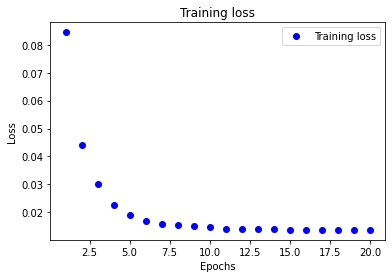

In [ ]:
loss = history.history['loss']

epochs = range(1,len(loss)+1)

plt.plot(epochs,loss,'bo',label='Training loss')
plt.title('Training loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

Training and validation accuracy

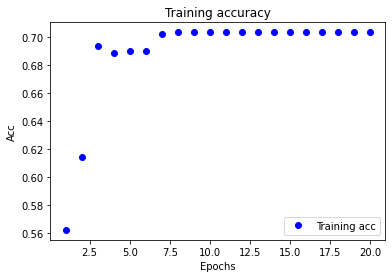

In [ ]:
plt.figure()
acc = history.history['accuracy']
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.title('Training accuracy')
plt.xlabel('Epochs')
plt.ylabel('Acc')
plt.legend()
plt.show()

Predictions on the newly trained model....

In [ ]:
predictions = model.predict(X_test)
Get_score(predictions, Y_test) # Try remember what the Spearman scores actually mean!

The Spearman's correlation coefficient is: -0.052
The Spearman's correlation coefficient is: 0.013


Saving your model

In [ ]:
model.save('/My Drive/CA684 - Machine Learning Assignment/HMP_Model.h5')  # creates a HDF5 file 'my_model.h5'

## 2.3 PCA to reduce dimension

In [ ]:
# Generate column names
columns = []
for i in range(len(pickl_df_hmp.loc[0,'HMP'])):
  columns.append(i)

In [ ]:
PCA_HMP = pd.DataFrame(pickl_df_hmp['HMP'].to_list(), columns = columns)

In [ ]:
PCA_HMP.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,6035,6036,6037,6038,6039,6040,6041,6042,6043,6044,6045,6046,6047,6048,6049,6050,6051,6052,6053,6054,6055,6056,6057,6058,6059,6060,6061,6062,6063,6064,6065,6066,6067,6068,6069,6070,6071,6072,6073,6074
0,0.125563,0.024036,0.000314,0.0,0.015864,0.000358,0.0,0.000000,0.000086,0.0,0.0,0.0,0.0,0.002795,0.000054,0.0,0.000000,0.000037,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000005,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000002,0.000173,0.000459,0.000000,0.000148,0.000104,0.000000,0.000121,0.000551,0.000000,0.000114,0.000884,0.000002,0.000116,0.000077,0.000002,0.000027,0.000136,0.000000,0.000000,0.000002,0.000000,0.000091,0.000035,0.000000,0.000163,0.000467,0.000002,0.000010,0.000017,0.000000,0.000393,0.000279,0.000000,0.000289,0.001926,0.000000,0.000086,0.000580,0.000000
1,0.007526,0.001421,0.000068,0.0,0.001184,0.000143,0.0,0.000000,0.000079,0.0,0.0,0.0,0.0,0.000246,0.000024,0.0,0.000000,0.000042,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000004,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000685,0.000308,0.001054,0.000751,0.000176,0.000062,0.000000,0.000123,0.000398,0.000086,0.000246,0.000433,0.000446,0.000143,0.000053,0.000000,0.000053,0.000099,0.000009,0.000004,0.000033,0.000004,0.000051,0.000035,0.000000,0.000062,0.000358,0.000035,0.000024,0.000083,0.000053,0.000244,0.000066,0.000000,0.000081,0.000617,0.000094,0.000220,0.000762,0.001224
2,0.109584,0.018978,0.000289,0.0,0.008774,0.000208,0.0,0.000002,0.000088,0.0,0.0,0.0,0.0,0.002046,0.000061,0.0,0.000000,0.000038,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000002,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000083,0.000057,0.000158,0.000073,0.000021,0.000009,0.000002,0.000019,0.000095,0.000021,0.000019,0.000090,0.000073,0.000050,0.000024,0.000000,0.000012,0.000021,0.000000,0.000000,0.000002,0.000000,0.000017,0.000007,0.000002,0.000066,0.000203,0.000026,0.000002,0.000040,0.000007,0.000054,0.000045,0.000000,0.000028,0.000291,0.000033,0.000052,0.000258,0.000215
3,0.120431,0.013561,0.000277,0.0,0.018974,0.000913,0.0,0.000024,0.000713,0.0,0.0,0.0,0.0,0.002496,0.000149,0.0,0.000011,0.000157,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000005,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000210,0.000434,0.000543,0.000412,0.000412,0.000045,0.000003,0.000144,0.000282,0.000037,0.000197,0.000218,0.000157,0.000237,0.000021,0.000000,0.000040,0.000056,0.000008,0.000005,0.000013,0.000019,0.000168,0.000013,0.000000,0.000133,0.000202,0.000029,0.000029,0.000035,0.000059,0.001110,0.000075,0.000008,0.000333,0.000793,0.000101,0.000588,0.000503,0.000452
4,0.005026,0.001356,0.000055,0.0,0.000665,0.000029,0.0,0.000000,0.000024,0.0,0.0,0.0,0.0,0.000147,0.000020,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000160,0.000996,0.001604,0.000103,0.000768,0.000215,0.000009,0.000415,0.000926,0.000020,0.000538,0.001178,0.000050,0.000518,0.000169,0.000007,0.000134,0.000169,0.000007,0.000026,0.000046,0.000007,0.000373,0.000088,0.000000,0.000338,0.000441,0.000029,0.000070,0.000149,0.000009,0.000882,0.000200,0.000009,0.000559,0.001097,0.000018,0.000632,0.001128,0.000064


In [ ]:
# Generate column names
PCA_columns = []
for i in range(100):
  PCA_columns.append('PCA'+str(i))
len(PCA_columns)

100

In [ ]:
pca = PCA(n_components=100)
principalComponents = pca.fit_transform(PCA_HMP)
principalDf = pd.DataFrame(data = principalComponents
             , columns = PCA_columns)
principalDf.head()

,PCA0,PCA1,PCA2,PCA3,PCA4,PCA5,PCA6,PCA7,PCA8,PCA9,PCA10,PCA11,PCA12,PCA13,PCA14,PCA15,PCA16,PCA17,PCA18,PCA19,PCA20,PCA21,PCA22,PCA23,PCA24,PCA25,PCA26,PCA27,PCA28,PCA29,PCA30,PCA31,PCA32,PCA33,PCA34,PCA35,PCA36,PCA37,PCA38,PCA39,...,PCA60,PCA61,PCA62,PCA63,PCA64,PCA65,PCA66,PCA67,PCA68,PCA69,PCA70,PCA71,PCA72,PCA73,PCA74,PCA75,PCA76,PCA77,PCA78,PCA79,PCA80,PCA81,PCA82,PCA83,PCA84,PCA85,PCA86,PCA87,PCA88,PCA89,PCA90,PCA91,PCA92,PCA93,PCA94,PCA95,PCA96,PCA97,PCA98,PCA99
0,0.102093,-0.022775,-0.012566,-0.007334,0.005708,-0.018789,-0.010647,-0.007567,-0.000473,-0.004699,0.005531,0.001799,0.003617,0.005426,-0.000819,0.001739,0.003488,-0.003767,-0.000426,-0.003877,0.001663,-0.003303,-0.001731,-0.001289,0.002878,0.002616,-0.000529,-0.002209,0.003940,0.000231,0.000560,0.001313,-0.004649,0.000695,-0.000826,0.001018,0.000146,0.002140,0.000679,-0.000389,...,0.000686,-0.001101,0.000956,0.000006,0.000636,-0.000757,-0.000709,0.000474,0.001631,-0.001092,-0.000019,-0.000768,0.001675,-0.000491,-0.001406,-0.000301,0.001170,-0.000693,0.000358,-0.000248,0.000824,0.001156,0.000402,0.000302,0.000277,-0.000009,0.001263,-0.000399,0.000162,-0.000914,0.000664,0.000948,-0.000094,-0.000372,0.000333,-0.000205,0.000074,-0.000604,-0.000542,-0.000070
1,-0.027480,0.014782,-0.007706,0.004680,-0.018600,0.005358,-0.018797,-0.010442,0.015245,0.009886,0.003516,-0.000194,0.002001,-0.002598,-0.003027,0.005247,0.000675,-0.003136,0.003093,0.001711,-0.005403,0.002060,0.001747,0.000776,0.000742,0.001425,0.000882,-0.000961,0.000328,-0.002514,-0.000230,-0.000283,0.001731,-0.000941,-0.003579,-0.000543,-0.003754,0.001298,0.002444,-0.002914,...,-0.000028,0.000133,-0.000056,0.000571,0.000484,0.000111,-0.000657,0.000697,-0.000809,0.000918,0.000584,0.000374,0.000753,-0.000641,0.000597,0.000500,0.000612,-0.000516,-0.000896,-0.000473,-0.000480,0.000880,0.000028,-0.000050,-0.000154,0.000063,-0.000723,-0.000237,0.001015,-0.000348,0.000590,0.000145,0.000008,-0.000098,0.000243,-0.000421,0.000326,0.000379,-0.000112,0.000087
2,0.096392,-0.022249,-0.023496,0.008948,0.043130,0.011504,-0.003400,-0.009570,0.002707,0.013276,0.008228,0.036603,-0.014472,-0.002949,-0.008191,-0.006012,-0.001919,0.000720,-0.012390,0.004713,0.005475,-0.002971,0.000204,0.005824,-0.009904,-0.006276,0.007628,-0.008600,-0.009220,-0.000917,-0.001893,0.005368,-0.001458,0.001671,-0.004418,-0.003758,0.001497,-0.001146,0.002702,-0.003932,...,0.003415,-0.001226,0.001802,0.002888,-0.000958,-0.000287,0.001331,0.001735,-0.002474,0.000686,-0.001950,-0.000136,-0.002721,0.002133,-0.001793,-0.000780,-0.001529,0.003039,-0.001779,-0.000818,0.001021,-0.001488,0.001712,-0.000242,0.000550,0.000275,0.001122,-0.000201,-0.000899,0.001957,-0.000146,-0.000931,0.000932,0.001023,-0.001124,-0.001650,-0.002091,0.000261,-0.001202,0.000845
3,0.110719,-0.006592,-0.007290,-0.005581,-0.027423,0.003599,-0.004011,-0.003332,-0.003770,-0.010008,0.013530,-0.002208,0.005392,0.001321,-0.001405,-0.002194,0.002354,-0.005120,0.008394,-0.002103,-0.000541,-0.001442,-0.001483,0.003393,-0.002315,-0.003217,0.001833,-0.003860,0.001966,0.001425,-0.002136,0.004543,0.002859,-0.002316,0.001759,0.000179,-0.001111,-0.000018,-0.000155,0.002144,...,0.001357,-0.001507,0.000924,0.001645,-0.000108,0.000378,-0.000351,-0.001143,0.000645,0.000369,0.000471,-0.000162,-0.000925,-0.000259,0.000541,-0.000023,-0.000560,-0.000179,-0.000153,-0.000050,-0.000822,-0.000029,0.000164,0.000414,0.000017,-0.000611,0.000162,-0.000239,-0.000103,0.000115,0.000058,0.000420,-0.000091,0.000007,-0.000173,0.000596,-0.000577,-0.000228,0.000071,-0.000306
4,-0.030392,-0.021138,0.008381,-0.000503,-0.005759,-0.005420,-0.003539,0.004919,0.004206,0.001777,0.004386,0.001321,0.003063,-0.001087,0.000373,0.000313,-0.001862,-0.002668,-0.001388,-0.000905,-0.000816,0.000278,-0.000036,0.001263,-0.000572,0.000263,0.000797,0.000883,-0.000671,0.001334,-0.000042,0.000996,-0.001239,0.000800,0.000967,-0.001019,0.000143,-0.000127,0.001014,-0.000740,...,-0.000228,-0.000564,-0.001063,0.000166,-0.000617,-0.000655,-0.001101,

In [ ]:
len(principalDf['PCA0'])

6000

In [ ]:
temp_PCA_Values = np.zeros((len(principalDf['PCA0']),100))
for i in range(len(principalDf['PCA0'])):
    for j in range(100):
      temp_PCA_Values[i,j] = principalDf.loc[i,'PCA'+str(j)]
print(temp_PCA_Values[0,0])

0.1020931051290748


In [ ]:
temp_PCA_Values.shape

(6000, 100)

In [ ]:
temp_PCA_Values[5999,0]

0.021012248245125962

In [ ]:
X_train, X_test, Y_train, Y_test = Split_data(temp_PCA_Values)

## 2.4 Gradient Boosting Regressor (0.296, 0.058)

In [ ]:
model= GradientBoostingRegressor()
model.fit(X_train, Y_train[:,0])

GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.1, loss='ls', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=100,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [ ]:
predictions = model.predict(X_test)

In [ ]:
Get_score(predictions, Y_test[:,0])

The Spearman's correlation coefficient is: 0.296


In [ ]:
model= GradientBoostingRegressor()
model.fit(X_train, Y_train[:,1])
predictions = model.predict(X_test)
Get_score(predictions, Y_test[:,1])

The Spearman's correlation coefficient is: 0.058


## 2.5 Random Forest (0.314, 0.080)

In [ ]:
# Instantiate model with 1000 decision trees
rf = RandomForestRegressor(n_estimators = 1000, random_state = 42)
# Train the model on training data
rf.fit(X_train, Y_train)

In [ ]:
predictions = rf.predict(X_test)

In [ ]:
Get_score(predictions, Y_test)

The Spearman's correlation coefficient is: 0.314
The Spearman's correlation coefficient is: 0.080


## 2.6 Elastic Net (0.272, 0.112)

In [ ]:
# define model
model = ElasticNet()
# define model evaluation method
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
# define grid
grid = dict()
grid['alpha'] = [1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 0.0, 1.0, 10.0, 100.0]
grid['l1_ratio'] = arange(0, 1, 0.01)
# define search
search = GridSearchCV(model, grid, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)
# perform the search
results = search.fit(X_train, Y_train)
# summarize
print('MAE: %.3f' % results.best_score_)
print('Config: %s' % results.best_params_)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 14.815319827384897, tolerance: 0.0031603040479166646
  positive)


MAE: -0.088
Config: {'alpha': 1e-05, 'l1_ratio': 0.0}


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 48.72059674237346, tolerance: 0.009935011935916671
  positive)


In [ ]:
ElasticNet_model = ElasticNet(alpha=1e-05, l1_ratio=0.0)
ElasticNet_model.fit(X_train, Y_train)
predictions = ElasticNet_model.predict(X_test)
Get_score(predictions, Y_test)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 14.815319827384897, tolerance: 0.0031603040479166646
  positive)


The Spearman's correlation coefficient is: 0.272
The Spearman's correlation coefficient is: 0.112


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 48.72059674237346, tolerance: 0.009935011935916671
  positive)


## 2.7 Support Vector Regressor (0.309, 0.091)

In [ ]:
regressor = BaggingRegressor(SVR(kernel = 'rbf'))
regressor.fit(X_train, Y_train[:,0]);
predictions = regressor.predict(X_test)
Get_score(predictions, Y_test[:,0])

The Spearman's correlation coefficient is: 0.309


In [ ]:
regressor_long_term_memorability =  BaggingRegressor(SVR(kernel = 'rbf'))
regressor_long_term_memorability.fit(X_train, Y_train[:,1]);
predictions_long_term = regressor_long_term_memorability.predict(X_test)
Get_score(predictions_long_term, Y_test[:,1])

The Spearman's correlation coefficient is: 0.091


# 3> Predicting video memorability using C3D

## 3.1 Loading C3D

read_C3D() - reads C3D files from the Google drive

In [ ]:
#Change the directory
os.chdir('/content/drive/My Drive/CA684_Assignment')

# load C3D
def read_C3D(fname):
    """Scan vectors from file"""
    with open(fname) as f:
        for line in f:
            C3D =[float(item) for item in line.split()] # convert to float type, using default separator
    return C3D

Store C3D features in a dataframe and save the values in pickle file.

In [ ]:
df_c3d = pd.DataFrame(columns=['video','C3D'])

pbar = pyprind.ProgBar(len(labels['video']), title='Loading C3D files')

# load the C3D
for i, video in enumerate(labels['video']):
    File_name = (video.split('.')[0]) + '.txt'
    c3d_path = './Dev-set/C3D/' + File_name
    df_c3d.loc[i,'video'] = video
    df_c3d.loc[i,'C3D'] = read_C3D(c3d_path)
    pbar.update()

os.chdir('/content/drive/My Drive/')
!pwd
df_c3d.to_pickle("C3D_file.pkl")

Loading C3D files
0% [##############################] 100% | ETA: 00:00:00

/content/drive/My Drive



Total time elapsed: 01:07:49


Load C3D_file.pkl from the Google drive and check the values.

In [ ]:
os.chdir('/content/drive/My Drive/CA684 - Machine Learning Assignment')
pickle_df_c3d = pd.read_pickle("C3D_file.pkl")
print(pickle_df_c3d)

               video                                                C3D
0        video3.webm  [0.02024942, 0.0015778, 0.00082625, 0.00094509...
1        video4.webm  [0.000118, 0.00089075, 0.00018769, 4.543e-05, ...
2        video6.webm  [0.01176522, 0.00074577, 0.00078353, 1.328e-05...
3        video8.webm  [0.00022343, 0.00016499, 7.35e-06, 1.615e-05, ...
4       video10.webm  [9.006e-05, 0.00061494, 0.00343634, 0.00128092...
...              ...                                                ...
5995  video7488.webm  [0.35724622, 0.07598178, 0.00302532, 2.772e-05...
5996  video7489.webm  [0.19280288, 0.00093812, 0.00506054, 1.35e-06,...
5997  video7491.webm  [2.589e-05, 0.00012192, 2.781e-05, 2.608e-05, ...
5998  video7492.webm  [0.26509121, 0.09653918, 5.971e-05, 0.00022735...
5999  video7493.webm  [0.02058949, 0.00122141, 0.00206607, 0.0023161...

[6000 rows x 2 columns]


Define the maximum length of sequence

In [ ]:
# calculating max length
max_len = 101

Making sequences index same length by calling X_seq function

In [ ]:
print(len(pickle_df_c3d.loc[0]['C3D'])) # length of 1st sequence
print(len(pickle_df_c3d['C3D']))

101
6000


In [ ]:
X_seq = define_x_seq(pickle_df_c3d,max_len,'C3D', len(pickle_df_c3d.loc[0,'C3D']))
X_seq.shape

(6000, 101)

In [ ]:
print(X_seq[5999,:])

[2.0589490e-02 1.2214100e-03 2.0660700e-03 2.3161800e-03 1.2580000e-05
 5.6380000e-05 2.5767000e-04 1.5191000e-04 4.1251000e-04 1.8630000e-05
 4.3249000e-04 1.6259000e-04 1.2113320e-02 5.2986000e-04 4.0460000e-05
 2.0667000e-04 7.8200000e-06 8.8940000e-05 2.3304700e-03 8.1199000e-04
 4.5800000e-06 4.6400000e-04 2.3897000e-04 1.7790000e-05 2.4846527e-01
 2.3047000e-04 1.5688000e-04 1.4170000e-05 6.4286000e-04 1.7171820e-02
 1.1053000e-04 2.2820780e-02 4.2470000e-05 1.2259190e-02 3.5050000e-04
 1.7605000e-04 3.9480000e-05 4.9804500e-03 1.2539000e-04 2.2808000e-04
 1.0037300e-03 9.1440000e-05 2.5260000e-05 1.5086200e-03 1.8631000e-04
 6.8740000e-05 2.8500000e-05 6.9900000e-05 1.4110700e-02 6.0317610e-02
 2.2750000e-05 7.5110000e-05 1.2446600e-03 7.1812000e-04 4.6650000e-05
 1.3190000e-05 9.7560000e-05 1.3270000e-05 1.7229000e-04 9.1848000e-04
 6.1380000e-05 1.4814000e-04 7.0664700e-03 1.5180000e-04 5.1094000e-04
 7.9465000e-04 1.4176000e-03 5.1441000e-04 1.7459000e-04 1.4320000e-05
 5.021

In [ ]:
print(X_seq[0,:]) # length of 1st sequence after padding the caption with zeros.

[2.0249420e-02 1.5778000e-03 8.2625000e-04 9.4509000e-04 6.2790000e-05
 3.4900000e-06 1.1618200e-03 9.7420000e-05 2.1790000e-05 1.0330000e-05
 3.3725000e-04 6.3631000e-04 1.1117000e-04 1.0078200e-03 3.6100000e-06
 6.3123000e-04 3.9050000e-05 4.0980000e-05 9.1250000e-05 3.0321000e-04
 1.5410000e-05 3.1970000e-05 5.2210000e-05 6.1550000e-05 1.7464590e-02
 6.6581000e-04 6.5270000e-05 5.4450000e-05 2.7318000e-04 1.3858800e-03
 3.3300000e-06 1.3557900e-03 5.1650000e-04 2.4261200e-03 2.7191400e-03
 2.7700000e-06 1.5570800e-03 2.4923000e-04 2.6324300e-03 9.3050000e-05
 8.9018000e-04 9.8830000e-05 1.0030000e-05 2.2525000e-04 9.7030000e-05
 3.3656300e-03 7.9170000e-05 2.3487000e-04 5.0306000e-04 7.2603369e-01
 1.9330000e-05 1.3091000e-04 9.6670000e-05 1.3184000e-04 3.4292000e-04
 4.9308000e-04 9.7340000e-05 1.0900000e-06 3.7808000e-04 7.9463700e-03
 2.6512000e-04 9.6647170e-02 4.4577300e-03 1.1840050e-02 2.8666000e-04
 2.1951900e-03 2.7922400e-03 1.7740000e-05 3.3650700e-03 6.1050000e-05
 5.733

## 3.2 Building network model - using Keras library (0.273, 0.120)


Split data set to training and test data

In [ ]:
X_train, X_test, Y_train, Y_test = Split_data(X_seq)

Shape of the data

In [ ]:
print('X_train', X_train.shape)
print('X_test', X_test.shape)
print('Y_train', Y_train.shape)
print('Y_test', Y_test.shape)

X_train (4800, 101)
X_test (1200, 101)
Y_train (4800, 2)
Y_test (1200, 2)


### 3.2.1 Construction

A dense layer is just a regular layer of neurons in a NN. Each neuron recieves input from all the neurons in the previous layer, thus densely connected. 


The layer has a weight matrix W, a bias vector b, and the activations of previous layer a. The following is the docstring of class Dense from the keras documentation:

*output = activation(dot(input, kernel) + bias)*

where activation is the element-wise activation function passed as the activation argument, kernel is a weights matrix created by the layer, and bias is a bias vector created by the layer

In [ ]:
# add dropout - Helps prevent overfitting
# add regularizers - Regularizers allow to apply penalties on layer parameters or layer activity during optimization.
# activations - Used to determine the output of network. It maps the resulting values in between 0 to 1 or -1 to 1 etc. (depending upon the function).

model = Sequential() # The Sequential model is a linear stack of layers.

# You can simply add layers via the .add() method:
model.add(layers.Dense(10,activation='relu',kernel_regularizer=regularizers.l2(0.0005),input_shape=(max_len,))) # Just your regular densely-connected NN layer.
model.add(layers.Dropout(0.5)) #Dropout consists in randomly setting a fraction rate of input units to 0 at each update during training; helps prevent overfitting.
model.add(layers.Dense(10,activation='relu',kernel_regularizer=regularizers.l2(0.0005)))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(2,activation='sigmoid'))

### 3.2.2 Compilation
Define three arguments:

1.   An optimizer
2.   A loss function
3.   A list of metrics


In [ ]:
# compile the model 
model.compile(optimizer='rmsprop',loss='mse',metrics=['accuracy'])

### 3.2.3 Training

Train the model using our training and testing data.

In [ ]:
# training the model 
history = model.fit(X_train,Y_train,epochs=20)

Epoch 1/20
150/150 [==============================] - 1s 799us/step - loss: 0.0973 - accuracy: 0.3974
Epoch 2/20
150/150 [==============================] - 0s 820us/step - loss: 0.0368 - accuracy: 0.5167
Epoch 3/20
150/150 [==============================] - 0s 834us/step - loss: 0.0252 - accuracy: 0.6765
Epoch 4/20
150/150 [==============================] - 0s 767us/step - loss: 0.0203 - accuracy: 0.6908
Epoch 5/20
150/150 [==============================] - 0s 725us/step - loss: 0.0180 - accuracy: 0.6978
Epoch 6/20
150/150 [==============================] - 0s 742us/step - loss: 0.0168 - accuracy: 0.6950
Epoch 7/20
150/150 [==============================] - 0s 841us/step - loss: 0.0155 - accuracy: 0.6975
Epoch 8/20
150/150 [==============================] - 0s 893us/step - loss: 0.0152 - accuracy: 0.7030
Epoch 9/20
150/150 [==============================] - 0s 861us/step - loss: 0.0152 - accuracy: 0.6987
Epoch 10/20
150/150 [==============================] - 0s 780us/step - loss: 0.014

### 3.2.4 Visualising the validation and training loss

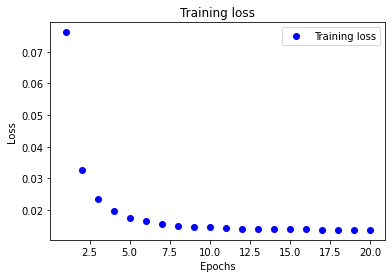

In [ ]:
loss = history.history['loss']

epochs = range(1,len(loss)+1)

plt.plot(epochs,loss,'bo',label='Training loss')
plt.title('Training loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

What is training and validation accuracy?

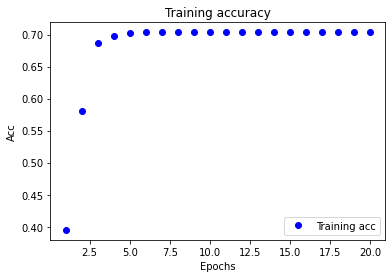

In [ ]:
plt.figure()
acc = history.history['accuracy']
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.title('Training accuracy')
plt.xlabel('Epochs')
plt.ylabel('Acc')
plt.legend()
plt.show()

Okay lets make some predictions now on the newly trained model....

In [ ]:
predictions = model.predict(X_test)
Get_score(predictions, Y_test) # Try remember what the Spearman scores actually mean!

The Spearman's correlation coefficient is: 0.273
The Spearman's correlation coefficient is: 0.120


Saving your model

In [ ]:
os.chdir('/content/drive/My Drive/')
pickle.dump(rf, open('C3D_Model.sav', 'wb'))

## 3.3 Random Forest (0.324, 0.114)

In [ ]:
# Instantiate model with 1000 decision trees
rf = RandomForestRegressor(n_estimators = 1000, random_state = 42)
# Train the model on training data
rf.fit(X_train, Y_train)

In [ ]:
predictions = rf.predict(X_test)

In [ ]:
Get_score(predictions, Y_test)

The Spearman's correlation coefficient is: 0.324
The Spearman's correlation coefficient is: 0.114


In [ ]:
os.chdir('/content/drive/My Drive/')
pickle.dump(rf, open('Rain_forest.sav', 'wb'))

## 3.4 Support Vector Regressor (0.265, 0.041)

In [ ]:
print(Y_train[1:2,0])

[0.787]


In [ ]:
regressor = BaggingRegressor(SVR(kernel = 'rbf'))
regressor.fit(X_train, Y_train[:,0])

In [ ]:
predictions = regressor.predict(X_test)

In [ ]:
Get_score(predictions, Y_test[:,0])

The Spearman's correlation coefficient is: 0.265


In [ ]:
regressor_long_term_memorability =  BaggingRegressor(SVR(kernel = 'rbf'))
regressor_long_term_memorability.fit(X_train, Y_train[:,1]);

In [ ]:
predictions_long_term = regressor_long_term_memorability.predict(X_test)

In [ ]:
Get_score(predictions_long_term, Y_test[:,1])

The Spearman's correlation coefficient is: 0.041


## 3.5 Gradient Boosting Regression (0.311, 0.110)

In [ ]:
model= GradientBoostingRegressor()
model.fit(X_train, Y_train[:,0])

GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.1, loss='ls', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=100,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [ ]:
predictions = model.predict(X_test)

In [ ]:
Get_score(predictions, Y_test[:,0])

The Spearman's correlation coefficient is: 0.311


In [ ]:
model= GradientBoostingRegressor()
model.fit(X_train, Y_train[:,1])
predictions = model.predict(X_test)
Get_score(predictions, Y_test[:,1])

The Spearman's correlation coefficient is: 0.110


## 3.6 Elastic Net (0.282, 0.118)

In [ ]:
# define model
model = ElasticNet()
# define model evaluation method
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
# define grid
grid = dict()
grid['alpha'] = [1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 0.0, 1.0, 10.0, 100.0]
grid['l1_ratio'] = arange(0, 1, 0.01)
# define search
search = GridSearchCV(model, grid, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)
# perform the search
results = search.fit(X_train, Y_train)
# summarize
print('MAE: %.3f' % results.best_score_)
print('Config: %s' % results.best_params_)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 14.308912512342543, tolerance: 0.0031603040479166646
  positive)


MAE: -0.087
Config: {'alpha': 0.001, 'l1_ratio': 0.0}


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 48.14746054834263, tolerance: 0.009935011935916671
  positive)


In [ ]:
ElasticNet_model = ElasticNet(alpha=0.001, l1_ratio=0.0)

In [ ]:
ElasticNet_model.fit(X_train, Y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 14.308912512342543, tolerance: 0.0031603040479166646
  positive)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 48.14746054834263, tolerance: 0.009935011935916671
  positive)


ElasticNet(alpha=0.001, copy_X=True, fit_intercept=True, l1_ratio=0.0,
           max_iter=1000, normalize=False, positive=False, precompute=False,
           random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

In [ ]:
predictions = ElasticNet_model.predict(X_test)

In [ ]:
Get_score(predictions, Y_test)

The Spearman's correlation coefficient is: 0.282
The Spearman's correlation coefficient is: 0.118


# 4> Predicting video memorability using LBP

## 4.1 Loading LBP

In [ ]:
os.chdir('/content/drive/My Drive/CA684_Assignment')

# Read LBP files
def read_LBP(fname):
    """Scan vectors from file"""   
    if os.path.exists(fname):
      with open(fname) as f:
          for line in f:
              LBP =[float(item) for item in line.split()] # convert to float type, using default separator
      return LBP
    else:
      return np.zeros(122)

df_lbp = pd.DataFrame(columns=['video','LBP-0','LBP-56','LBP-112'])

# load the LBP
for i, video in enumerate(labels['video']):
    df_lbp.loc[i,'video'] = video   
    df_lbp.loc[i,'LBP-0'] = read_LBP('./Dev-set/LBP/' + (video.split('.')[0]) + '-0.txt')
    df_lbp.loc[i,'LBP-56'] = read_LBP('./Dev-set/LBP/' + (video.split('.')[0]) + '-56.txt')
    df_lbp.loc[i,'LBP-112'] = read_LBP('./Dev-set/LBP/' + (video.split('.')[0]) + '-112.txt')

df_lbp.head()

,video,LBP-0,LBP-56,LBP-112
0,video3.webm,"[0.01183208, 0.00234423, 0.00182726, 0.0013999...","[0.01051071, 0.00238281, 0.00180411, 0.0014699...","[0.01043451, 0.00247637, 0.00192178, 0.0014665..."
1,video4.webm,"[0.00966435, 0.00291811, 0.00219425, 0.0018682...","[0.01016445, 0.00291377, 0.00232832, 0.0020452...","[0.00991127, 0.00292679, 0.00233845, 0.0020862..."
2,video6.webm,"[0.01084008, 0.00189525, 0.00154128, 0.0009606...","[0.00749759, 0.00117043, 0.00096595, 0.0007257...","[0.00782986, 0.00120563, 0.00085166, 0.0006939..."
3,video8.webm,"[0.01163436, 0.00431472, 0.00321277, 0.0019121...","[0.01338397, 0.00459394, 0.00335214, 0.0026601...","[0.01097222, 0.00419367, 0.0028178, 0.00211709..."
4,video10.webm,"[0.02525029, 0.00485774, 0.00489198, 0.0038623...","[0.02373216, 0.00531973, 0.00533999, 0.0046180...","[0.02204427, 0.00510851, 0.00511767, 0.0041420..."


In [ ]:
os.chdir('/content/drive/My Drive/')
df_lbp.to_pickle("LBP_file.pkl")

In [ ]:
os.chdir('/content/drive/My Drive/CA684 - Machine Learning Assignment')
df_lbp = pd.read_pickle("LBP_file.pkl")
print(df_lbp)

               video  ...                                            LBP-112
0        video3.webm  ...  [0.01043451, 0.00247637, 0.00192178, 0.0014665...
1        video4.webm  ...  [0.00991127, 0.00292679, 0.00233845, 0.0020862...
2        video6.webm  ...  [0.00782986, 0.00120563, 0.00085166, 0.0006939...
3        video8.webm  ...  [0.01097222, 0.00419367, 0.0028178, 0.00211709...
4       video10.webm  ...  [0.02204427, 0.00510851, 0.00511767, 0.0041420...
...              ...  ...                                                ...
5995  video7488.webm  ...  [0.01651235, 0.0036738, 0.00279562, 0.00200762...
5996  video7489.webm  ...  [0.03702064, 0.00227286, 0.00241802, 0.0025082...
5997  video7491.webm  ...  [0.02289207, 0.00598573, 0.00546055, 0.0042144...
5998  video7492.webm  ...  [0.01113329, 0.00202691, 0.00201678, 0.0017365...
5999  video7493.webm  ...  [0.01129292, 0.00211179, 0.0017853, 0.00150222...

[6000 rows x 4 columns]


In [ ]:
len(df_lbp.loc[0,'LBP-56'])

122

In [ ]:
# calculating max length
max_len = 366

In [ ]:
X_seq = np.zeros((len(df_lbp['LBP-112']),max_len))
count = 0
for i in range(len(df_lbp['LBP-112'])):
    n = 366
    if n==0:
        print(i)
    elif len(df_lbp.loc[i,'LBP-112'] + df_lbp.loc[i,'LBP-56'] + df_lbp.loc[i,'LBP-0']) == 366:
        X_seq[i,-n:] = df_lbp.loc[i,'LBP-0'] + df_lbp.loc[i,'LBP-56'] + df_lbp.loc[i,'LBP-112']
    else:
      count = count + 1
print(count)
X_seq.shape

15


(6000, 366)

In [ ]:
X_train, X_test, Y_train, Y_test = Split_data(X_seq)

## 4.2 Random Forest (0.328, 0.064)

In [ ]:
# Instantiate model with 1000 decision trees
rf = RandomForestRegressor(n_estimators = 1000, random_state = 42)
# Train the model on training data
rf.fit(X_train, Y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=1000, n_jobs=None, oob_score=False,
                      random_state=42, verbose=0, warm_start=False)

In [ ]:
predictions = rf.predict(X_test)

In [ ]:
Get_score(predictions, Y_test)

The Spearman's correlation coefficient is: 0.328
The Spearman's correlation coefficient is: 0.064


## 4.3 Support Vector Regressor (0.249, 0.085)

In [ ]:
regressor = BaggingRegressor(SVR(kernel = 'rbf'))
regressor.fit(X_train, Y_train[:,0])
predictions = regressor.predict(X_test)
Get_score(predictions, Y_test[:,0])

The Spearman's correlation coefficient is: 0.249


In [ ]:
regressor_long_term_memorability =  BaggingRegressor(SVR(kernel = 'rbf'))
regressor_long_term_memorability.fit(X_train, Y_train[:,1])
predictions_long_term = regressor_long_term_memorability.predict(X_test)
Get_score(predictions_long_term, Y_test[:,1])

The Spearman's correlation coefficient is: 0.085


## 4.4 Elastic Net (0.232, 0.077)

In [ ]:
ElasticNet_model = ElasticNet(alpha=0.001, l1_ratio=0.0)
ElasticNet_model.fit(X_train, Y_train)
predictions = ElasticNet_model.predict(X_test)
Get_score(predictions, Y_test)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 15.39708553954809, tolerance: 0.0031603040479166646
  positive)


The Spearman's correlation coefficient is: 0.232
The Spearman's correlation coefficient is: 0.077


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 49.38808776517216, tolerance: 0.009935011935916671
  positive)


## 4.5 Gradient Boosting Regression (0.298, 0.061)

In [ ]:
model= GradientBoostingRegressor()
model.fit(X_train, Y_train[:,0])
predictions = model.predict(X_test)
Get_score(predictions, Y_test[:,0])

The Spearman's correlation coefficient is: 0.298


In [ ]:
model= GradientBoostingRegressor()
model.fit(X_train, Y_train[:,1])
predictions = model.predict(X_test)
Get_score(predictions, Y_test[:,1])

The Spearman's correlation coefficient is: 0.061


# 5> Predicting video memorability using Aesthetic features

## 5.1 Loading Aesthetic features

In [ ]:
os.chdir('/content/drive/My Drive/CA684 - Machine Learning Assignment/dev-set_aesthetic-features/features/aesthetic_visual_features')

# Read Aesthetic mean and median feature files
def read_aesthetic_features(fname):
    """Scan vectors from file""" 
    if os.path.exists(fname):
      with open(fname) as f:
          for line in f:
              aes =[float(item) for item in line.split(',')] # convert to float type, using default separator
      return aes
    else:
      return np.zeros(109)

In [ ]:
df_aes = pd.DataFrame(columns=['video','AES-mean','AES-median'])

pbar = pyprind.ProgBar(len(labels['video']), title='Loading Aesthetic files')

# load the Aesthetic files
for i, video in enumerate(labels['video']):
    df_aes.loc[i,'video'] = video   
    df_aes.loc[i,'AES-mean'] = read_aesthetic_features('./aesthetic_feat_dev-set_mean/' + (video.split('.')[0]) + '.txt')
    df_aes.loc[i,'AES-median'] = read_aesthetic_features('./aesthetic_feat_dev-set_median/' + (video.split('.')[0]) + '.txt')
    print(video)
    pbar.update()

df_aes.head()

Loading Aesthetic files


video3.webm
video4.webm
video6.webm
video8.webm
video10.webm
video12.webm
video13.webm
video16.webm
video17.webm
video18.webm
video19.webm
video20.webm
video21.webm
video22.webm
video23.webm
video25.webm
video26.webm
video27.webm
video28.webm
video29.webm
video30.webm
video31.webm
video32.webm
video33.webm
video34.webm
video35.webm
video36.webm
video37.webm
video38.webm
video39.webm
video40.webm
video41.webm
video43.webm
video44.webm
video45.webm
video46.webm
video47.webm
video48.webm
video49.webm
video51.webm
video52.webm
video53.webm
video54.webm
video55.webm
video56.webm
video57.webm
video58.webm
video60.webm
video61.webm
video62.webm
video63.webm
video65.webm
video66.webm
video67.webm
video68.webm
video69.webm
video72.webm
video73.webm
video74.webm
video75.webm
video76.webm
video77.webm
video78.webm
video79.webm
video80.webm
video81.webm
video82.webm
video83.webm
video84.webm
video85.webm
video86.webm
video87.webm
video88.webm
video89.webm
video90.webm
video92.webm
video93.webm
vid

0% [#                             ] 100% | ETA: 00:43:30

video251.webm
video253.webm
video254.webm
video255.webm
video256.webm
video257.webm
video258.webm
video259.webm
video260.webm
video261.webm
video265.webm
video267.webm
video269.webm
video271.webm
video272.webm
video273.webm
video274.webm
video275.webm
video276.webm
video277.webm
video278.webm
video279.webm
video280.webm
video281.webm
video282.webm
video283.webm
video284.webm
video287.webm
video288.webm
video290.webm
video291.webm
video292.webm
video293.webm
video294.webm
video295.webm
video296.webm
video297.webm
video298.webm
video299.webm
video300.webm
video301.webm
video302.webm
video303.webm
video304.webm
video305.webm
video306.webm
video308.webm
video310.webm
video311.webm
video313.webm
video315.webm
video316.webm
video317.webm
video318.webm
video319.webm
video321.webm
video322.webm
video323.webm
video324.webm
video325.webm
video326.webm
video327.webm
video329.webm
video330.webm
video331.webm
video332.webm
video333.webm
video334.webm
video335.webm
video336.webm
video338.webm
video3

0% [##                            ] 100% | ETA: 01:03:21

video499.webm
video500.webm
video501.webm
video502.webm
video503.webm
video504.webm
video505.webm
video506.webm
video508.webm
video509.webm
video510.webm
video511.webm
video512.webm
video513.webm
video515.webm
video516.webm
video517.webm
video518.webm
video519.webm
video521.webm
video522.webm
video524.webm
video525.webm
video529.webm
video530.webm
video531.webm
video532.webm
video533.webm
video534.webm
video535.webm
video536.webm
video537.webm
video538.webm
video539.webm
video540.webm
video541.webm
video542.webm
video543.webm
video544.webm
video545.webm
video546.webm
video547.webm
video548.webm
video549.webm
video550.webm
video552.webm
video553.webm
video554.webm
video555.webm
video556.webm
video557.webm
video558.webm
video559.webm
video560.webm
video561.webm
video562.webm
video563.webm
video564.webm
video565.webm
video566.webm
video567.webm
video568.webm
video569.webm
video571.webm
video573.webm
video574.webm
video576.webm
video577.webm
video578.webm
video579.webm
video580.webm
video5

0% [###                           ] 100% | ETA: 01:07:29

video737.webm
video738.webm
video740.webm
video741.webm
video742.webm
video743.webm
video744.webm
video745.webm
video746.webm
video747.webm
video749.webm
video750.webm
video751.webm
video752.webm
video753.webm
video754.webm
video755.webm
video757.webm
video758.webm
video759.webm
video760.webm
video761.webm
video762.webm
video763.webm
video764.webm
video765.webm
video767.webm
video769.webm
video770.webm
video771.webm
video773.webm
video775.webm
video776.webm
video777.webm
video778.webm
video779.webm
video781.webm
video782.webm
video783.webm
video785.webm
video786.webm
video787.webm
video788.webm
video789.webm
video790.webm
video791.webm
video792.webm
video793.webm
video794.webm
video795.webm
video796.webm
video797.webm
video798.webm
video799.webm
video800.webm
video801.webm
video803.webm
video805.webm
video806.webm
video807.webm
video808.webm
video809.webm
video811.webm
video812.webm
video813.webm
video814.webm
video816.webm
video817.webm
video818.webm
video819.webm
video820.webm
video8

0% [####                          ] 100% | ETA: 01:07:32

video988.webm
video990.webm
video991.webm
video992.webm
video993.webm
video994.webm
video995.webm
video997.webm
video998.webm
video999.webm
video1001.webm
video1003.webm
video1004.webm
video1005.webm
video1006.webm
video1007.webm
video1009.webm
video1012.webm
video1014.webm
video1015.webm
video1017.webm
video1019.webm
video1020.webm
video1021.webm
video1022.webm
video1023.webm
video1024.webm
video1025.webm
video1027.webm
video1028.webm
video1030.webm
video1031.webm
video1032.webm
video1033.webm
video1035.webm
video1036.webm
video1038.webm
video1039.webm
video1040.webm
video1041.webm
video1042.webm
video1043.webm
video1044.webm
video1045.webm
video1046.webm
video1047.webm
video1048.webm
video1049.webm
video1050.webm
video1051.webm
video1052.webm
video1053.webm
video1054.webm
video1055.webm
video1056.webm
video1057.webm
video1060.webm
video1061.webm
video1063.webm
video1064.webm
video1065.webm
video1066.webm
video1067.webm
video1069.webm
video1070.webm
video1071.webm
video1073.webm
video

0% [#####                         ] 100% | ETA: 01:06:42

video1239.webm
video1241.webm
video1242.webm
video1243.webm
video1244.webm
video1245.webm
video1246.webm
video1247.webm
video1249.webm
video1250.webm
video1251.webm
video1253.webm
video1254.webm
video1255.webm
video1256.webm
video1257.webm
video1258.webm
video1259.webm
video1260.webm
video1261.webm
video1263.webm
video1264.webm
video1265.webm
video1266.webm
video1267.webm
video1270.webm
video1272.webm
video1273.webm
video1274.webm
video1275.webm
video1277.webm
video1278.webm
video1280.webm
video1281.webm
video1282.webm
video1283.webm
video1284.webm
video1285.webm
video1286.webm
video1288.webm
video1289.webm
video1290.webm
video1291.webm
video1293.webm
video1294.webm
video1295.webm
video1296.webm
video1297.webm
video1298.webm
video1299.webm
video1300.webm
video1301.webm
video1305.webm
video1307.webm
video1309.webm
video1310.webm
video1311.webm
video1312.webm
video1315.webm
video1317.webm
video1319.webm
video1321.webm
video1322.webm
video1324.webm
video1325.webm
video1328.webm
video1329.

0% [######                        ] 100% | ETA: 01:05:01

video1492.webm
video1493.webm
video1494.webm
video1496.webm
video1497.webm
video1498.webm
video1499.webm
video1502.webm
video1503.webm
video1504.webm
video1505.webm
video1506.webm
video1507.webm
video1508.webm
video1509.webm
video1510.webm
video1511.webm
video1513.webm
video1514.webm
video1515.webm
video1516.webm
video1517.webm
video1518.webm
video1519.webm
video1522.webm
video1524.webm
video1525.webm
video1526.webm
video1527.webm
video1528.webm
video1529.webm
video1530.webm
video1531.webm
video1533.webm
video1534.webm
video1535.webm
video1536.webm
video1537.webm
video1538.webm
video1539.webm
video1540.webm
video1541.webm
video1542.webm
video1543.webm
video1544.webm
video1546.webm
video1547.webm
video1548.webm
video1549.webm
video1550.webm
video1551.webm
video1553.webm
video1554.webm
video1555.webm
video1556.webm
video1558.webm
video1559.webm
video1560.webm
video1561.webm
video1562.webm
video1563.webm
video1564.webm
video1565.webm
video1569.webm
video1570.webm
video1571.webm
video1572.

0% [#######                       ] 100% | ETA: 01:02:55

video1741.webm
video1742.webm
video1743.webm
video1744.webm
video1745.webm
video1746.webm
video1747.webm
video1748.webm
video1749.webm
video1750.webm
video1751.webm
video1753.webm
video1755.webm
video1756.webm
video1757.webm
video1758.webm
video1759.webm
video1760.webm
video1761.webm
video1762.webm
video1763.webm
video1764.webm
video1765.webm
video1766.webm
video1767.webm
video1768.webm
video1769.webm
video1770.webm
video1771.webm
video1772.webm
video1774.webm
video1777.webm
video1778.webm
video1779.webm
video1780.webm
video1781.webm
video1782.webm
video1784.webm
video1785.webm
video1786.webm
video1789.webm
video1790.webm
video1793.webm
video1794.webm
video1795.webm
video1797.webm
video1799.webm
video1800.webm
video1801.webm
video1802.webm
video1803.webm
video1804.webm
video1805.webm
video1806.webm
video1807.webm
video1809.webm
video1810.webm
video1811.webm
video1812.webm
video1813.webm
video1814.webm
video1815.webm
video1817.webm
video1818.webm
video1819.webm
video1821.webm
video1822.

0% [########                      ] 100% | ETA: 01:00:39

video1981.webm
video1982.webm
video1983.webm
video1984.webm
video1985.webm
video1986.webm
video1988.webm
video1989.webm
video1990.webm
video1991.webm
video1993.webm
video1995.webm
video1996.webm
video1997.webm
video1998.webm
video1999.webm
video2001.webm
video2002.webm
video2003.webm
video2004.webm
video2005.webm
video2008.webm
video2009.webm
video2011.webm
video2012.webm
video2013.webm
video2014.webm
video2016.webm
video2018.webm
video2019.webm
video2020.webm
video2022.webm
video2024.webm
video2025.webm
video2026.webm
video2027.webm
video2028.webm
video2029.webm
video2030.webm
video2031.webm
video2032.webm
video2033.webm
video2034.webm
video2035.webm
video2036.webm
video2037.webm
video2038.webm
video2041.webm
video2042.webm
video2044.webm
video2045.webm
video2046.webm
video2049.webm
video2050.webm
video2051.webm
video2052.webm
video2054.webm
video2055.webm
video2058.webm
video2059.webm
video2060.webm
video2061.webm
video2062.webm
video2063.webm
video2064.webm
video2065.webm
video2066.

0% [#########                     ] 100% | ETA: 00:58:14

video2238.webm
video2239.webm
video2240.webm
video2242.webm
video2244.webm
video2245.webm
video2246.webm
video2248.webm
video2249.webm
video2250.webm
video2251.webm
video2252.webm
video2253.webm
video2254.webm
video2255.webm
video2256.webm
video2257.webm
video2258.webm
video2259.webm
video2260.webm
video2261.webm
video2262.webm
video2263.webm
video2264.webm
video2266.webm
video2267.webm
video2268.webm
video2270.webm
video2272.webm
video2273.webm
video2274.webm
video2275.webm
video2276.webm
video2278.webm
video2280.webm
video2282.webm
video2283.webm
video2284.webm
video2285.webm
video2286.webm
video2289.webm
video2290.webm
video2291.webm
video2292.webm
video2293.webm
video2295.webm
video2296.webm
video2297.webm
video2298.webm
video2300.webm
video2301.webm
video2302.webm
video2303.webm
video2304.webm
video2306.webm
video2308.webm
video2309.webm
video2310.webm
video2311.webm
video2312.webm
video2314.webm
video2315.webm
video2316.webm
video2317.webm
video2318.webm
video2319.webm
video2321.

0% [##########                    ] 100% | ETA: 00:55:40

video2484.webm
video2485.webm
video2486.webm
video2488.webm
video2489.webm
video2490.webm
video2491.webm
video2492.webm
video2494.webm
video2495.webm
video2496.webm
video2497.webm
video2498.webm
video2499.webm
video2500.webm
video2501.webm
video2502.webm
video2505.webm
video2507.webm
video2508.webm
video2509.webm
video2512.webm
video2513.webm
video2514.webm
video2515.webm
video2516.webm
video2517.webm
video2519.webm
video2520.webm
video2523.webm
video2524.webm
video2525.webm
video2527.webm
video2528.webm
video2529.webm
video2530.webm
video2531.webm
video2532.webm
video2533.webm
video2535.webm
video2536.webm
video2538.webm
video2539.webm
video2540.webm
video2541.webm
video2542.webm
video2543.webm
video2545.webm
video2546.webm
video2547.webm
video2548.webm
video2549.webm
video2550.webm
video2551.webm
video2552.webm
video2553.webm
video2554.webm
video2555.webm
video2556.webm
video2557.webm
video2558.webm
video2559.webm
video2561.webm
video2562.webm
video2564.webm
video2566.webm
video2567.

0% [###########                   ] 100% | ETA: 00:53:03

video2733.webm
video2734.webm
video2736.webm
video2737.webm
video2738.webm
video2739.webm
video2740.webm
video2741.webm
video2742.webm
video2743.webm
video2744.webm
video2745.webm
video2747.webm
video2748.webm
video2749.webm
video2750.webm
video2755.webm
video2756.webm
video2757.webm
video2758.webm
video2759.webm
video2760.webm
video2761.webm
video2762.webm
video2763.webm
video2764.webm
video2765.webm
video2767.webm
video2769.webm
video2770.webm
video2771.webm
video2772.webm
video2773.webm
video2774.webm
video2775.webm
video2777.webm
video2779.webm
video2780.webm
video2781.webm
video2782.webm
video2784.webm
video2785.webm
video2786.webm
video2787.webm
video2788.webm
video2789.webm
video2791.webm
video2792.webm
video2793.webm
video2794.webm
video2796.webm
video2797.webm
video2798.webm
video2799.webm
video2800.webm
video2801.webm
video2802.webm
video2803.webm
video2804.webm
video2805.webm
video2807.webm
video2808.webm
video2809.webm
video2811.webm
video2812.webm
video2813.webm
video2816.

0% [############                  ] 100% | ETA: 00:50:28

video2982.webm
video2983.webm
video2984.webm
video2985.webm
video2986.webm
video2987.webm
video2988.webm
video2990.webm
video2991.webm
video2992.webm
video2994.webm
video2996.webm
video2997.webm
video2998.webm
video2999.webm
video3000.webm
video3001.webm
video3002.webm
video3003.webm
video3004.webm
video3005.webm
video3006.webm
video3007.webm
video3009.webm
video3010.webm
video3012.webm
video3014.webm
video3015.webm
video3018.webm
video3019.webm
video3020.webm
video3021.webm
video3022.webm
video3023.webm
video3024.webm
video3025.webm
video3026.webm
video3028.webm
video3029.webm
video3030.webm
video3031.webm
video3032.webm
video3035.webm
video3036.webm
video3037.webm
video3039.webm
video3040.webm
video3041.webm
video3042.webm
video3043.webm
video3044.webm
video3046.webm
video3047.webm
video3048.webm
video3049.webm
video3050.webm
video3051.webm
video3053.webm
video3054.webm
video3055.webm
video3056.webm
video3057.webm
video3058.webm
video3059.webm
video3060.webm
video3061.webm
video3062.

0% [#############                 ] 100% | ETA: 00:47:50

video3224.webm
video3225.webm
video3227.webm
video3230.webm
video3231.webm
video3232.webm
video3235.webm
video3236.webm
video3237.webm
video3238.webm
video3239.webm
video3242.webm
video3243.webm
video3244.webm
video3245.webm
video3246.webm
video3247.webm
video3248.webm
video3249.webm
video3250.webm
video3251.webm
video3252.webm
video3254.webm
video3255.webm
video3256.webm
video3258.webm
video3259.webm
video3261.webm
video3262.webm
video3263.webm
video3264.webm
video3265.webm
video3266.webm
video3268.webm
video3269.webm
video3270.webm
video3271.webm
video3273.webm
video3275.webm
video3276.webm
video3277.webm
video3278.webm
video3280.webm
video3281.webm
video3282.webm
video3283.webm
video3284.webm
video3285.webm
video3286.webm
video3287.webm
video3288.webm
video3291.webm
video3292.webm
video3294.webm
video3297.webm
video3299.webm
video3301.webm
video3304.webm
video3305.webm
video3307.webm
video3308.webm
video3309.webm
video3311.webm
video3313.webm
video3314.webm
video3315.webm
video3316.

0% [##############                ] 100% | ETA: 00:45:09

video3493.webm
video3495.webm
video3496.webm
video3497.webm
video3498.webm
video3499.webm
video3500.webm
video3501.webm
video3503.webm
video3504.webm
video3505.webm
video3506.webm
video3507.webm
video3508.webm
video3509.webm
video3510.webm
video3511.webm
video3512.webm
video3513.webm
video3515.webm
video3516.webm
video3517.webm
video3518.webm
video3519.webm
video3523.webm
video3524.webm
video3525.webm
video3526.webm
video3527.webm
video3528.webm
video3529.webm
video3530.webm
video3532.webm
video3533.webm
video3534.webm
video3535.webm
video3536.webm
video3537.webm
video3538.webm
video3539.webm
video3540.webm
video3543.webm
video3545.webm
video3546.webm
video3547.webm
video3551.webm
video3553.webm
video3554.webm
video3555.webm
video3556.webm
video3557.webm
video3558.webm
video3560.webm
video3561.webm
video3563.webm
video3564.webm
video3567.webm
video3569.webm
video3570.webm
video3571.webm
video3572.webm
video3574.webm
video3575.webm
video3576.webm
video3577.webm
video3578.webm
video3579.

0% [###############               ] 100% | ETA: 00:42:24

video3757.webm
video3758.webm
video3759.webm
video3760.webm
video3761.webm
video3762.webm
video3763.webm
video3764.webm
video3765.webm
video3766.webm
video3767.webm
video3768.webm
video3769.webm
video3770.webm
video3771.webm
video3772.webm
video3773.webm
video3776.webm
video3777.webm
video3778.webm
video3779.webm
video3780.webm
video3783.webm
video3784.webm
video3785.webm
video3786.webm
video3787.webm
video3788.webm
video3789.webm
video3790.webm
video3791.webm
video3792.webm
video3793.webm
video3794.webm
video3795.webm
video3797.webm
video3798.webm
video3799.webm
video3800.webm
video3801.webm
video3802.webm
video3803.webm
video3804.webm
video3807.webm
video3809.webm
video3810.webm
video3811.webm
video3812.webm
video3813.webm
video3814.webm
video3815.webm
video3816.webm
video3817.webm
video3818.webm
video3819.webm
video3820.webm
video3821.webm
video3822.webm
video3824.webm
video3825.webm
video3828.webm
video3829.webm
video3831.webm
video3832.webm
video3833.webm
video3834.webm
video3835.

0% [################              ] 100% | ETA: 00:39:36

video4014.webm
video4015.webm
video4016.webm
video4017.webm
video4018.webm
video4020.webm
video4022.webm
video4024.webm
video4026.webm
video4028.webm
video4029.webm
video4030.webm
video4031.webm
video4032.webm
video4033.webm
video4035.webm
video4039.webm
video4040.webm
video4043.webm
video4044.webm
video4045.webm
video4046.webm
video4047.webm
video4049.webm
video4050.webm
video4051.webm
video4052.webm
video4054.webm
video4055.webm
video4056.webm
video4057.webm
video4058.webm
video4059.webm
video4060.webm
video4061.webm
video4062.webm
video4063.webm
video4064.webm
video4065.webm
video4066.webm
video4067.webm
video4068.webm
video4069.webm
video4070.webm
video4071.webm
video4074.webm
video4075.webm
video4077.webm
video4078.webm
video4079.webm
video4080.webm
video4081.webm
video4082.webm
video4083.webm
video4085.webm
video4086.webm
video4087.webm
video4088.webm
video4089.webm
video4091.webm
video4092.webm
video4094.webm
video4095.webm
video4097.webm
video4098.webm
video4099.webm
video4100.

0% [#################             ] 100% | ETA: 00:36:51

video4265.webm
video4266.webm
video4269.webm
video4272.webm
video4273.webm
video4274.webm
video4275.webm
video4276.webm
video4277.webm
video4278.webm
video4279.webm
video4280.webm
video4281.webm
video4282.webm
video4283.webm
video4284.webm
video4285.webm
video4286.webm
video4287.webm
video4288.webm
video4291.webm
video4292.webm
video4293.webm
video4294.webm
video4295.webm
video4296.webm
video4297.webm
video4298.webm
video4299.webm
video4302.webm
video4303.webm
video4305.webm
video4306.webm
video4307.webm
video4308.webm
video4309.webm
video4310.webm
video4312.webm
video4314.webm
video4315.webm
video4316.webm
video4318.webm
video4319.webm
video4321.webm
video4322.webm
video4323.webm
video4324.webm
video4325.webm
video4327.webm
video4328.webm
video4329.webm
video4331.webm
video4332.webm
video4334.webm
video4335.webm
video4336.webm
video4337.webm
video4338.webm
video4339.webm
video4340.webm
video4341.webm
video4342.webm
video4343.webm
video4344.webm
video4345.webm
video4347.webm
video4348.

0% [##################            ] 100% | ETA: 00:34:05

video4511.webm
video4512.webm
video4513.webm
video4515.webm
video4516.webm
video4518.webm
video4519.webm
video4520.webm
video4522.webm
video4523.webm
video4524.webm
video4525.webm
video4526.webm
video4527.webm
video4528.webm
video4529.webm
video4530.webm
video4531.webm
video4533.webm
video4534.webm
video4536.webm
video4537.webm
video4538.webm
video4539.webm
video4540.webm
video4542.webm
video4543.webm
video4544.webm
video4545.webm
video4546.webm
video4547.webm
video4548.webm
video4549.webm
video4550.webm
video4552.webm
video4553.webm
video4554.webm
video4557.webm
video4558.webm
video4559.webm
video4562.webm
video4563.webm
video4564.webm
video4565.webm
video4566.webm
video4567.webm
video4568.webm
video4569.webm
video4570.webm
video4571.webm
video4573.webm
video4575.webm
video4576.webm
video4577.webm
video4578.webm
video4580.webm
video4581.webm
video4582.webm
video4583.webm
video4585.webm
video4587.webm
video4590.webm
video4594.webm
video4595.webm
video4597.webm
video4598.webm
video4599.

0% [###################           ] 100% | ETA: 00:31:16

video4772.webm
video4773.webm
video4774.webm
video4775.webm
video4776.webm
video4777.webm
video4779.webm
video4780.webm
video4781.webm
video4782.webm
video4783.webm
video4787.webm
video4788.webm
video4790.webm
video4791.webm
video4793.webm
video4794.webm
video4795.webm
video4796.webm
video4797.webm
video4798.webm
video4799.webm
video4800.webm
video4801.webm
video4802.webm
video4803.webm
video4804.webm
video4805.webm
video4807.webm
video4808.webm
video4809.webm
video4810.webm
video4811.webm
video4812.webm
video4813.webm
video4814.webm
video4815.webm
video4816.webm
video4817.webm
video4818.webm
video4819.webm
video4820.webm
video4821.webm
video4822.webm
video4823.webm
video4824.webm
video4825.webm
video4826.webm
video4827.webm
video4828.webm
video4829.webm
video4830.webm
video4831.webm
video4832.webm
video4833.webm
video4834.webm
video4835.webm
video4836.webm
video4837.webm
video4838.webm
video4839.webm
video4840.webm
video4841.webm
video4842.webm
video4843.webm
video4844.webm
video4845.

0% [####################          ] 100% | ETA: 00:28:29

video5017.webm
video5018.webm
video5019.webm
video5020.webm
video5022.webm
video5023.webm
video5024.webm
video5025.webm
video5026.webm
video5028.webm
video5029.webm
video5030.webm
video5031.webm
video5032.webm
video5033.webm
video5034.webm
video5036.webm
video5037.webm
video5038.webm
video5039.webm
video5041.webm
video5042.webm
video5043.webm
video5044.webm
video5045.webm
video5047.webm
video5048.webm
video5049.webm
video5050.webm
video5051.webm
video5055.webm
video5056.webm
video5058.webm
video5059.webm
video5060.webm
video5061.webm
video5062.webm
video5063.webm
video5064.webm
video5066.webm
video5068.webm
video5069.webm
video5070.webm
video5072.webm
video5074.webm
video5075.webm
video5076.webm
video5078.webm
video5080.webm
video5081.webm
video5082.webm
video5083.webm
video5084.webm
video5085.webm
video5086.webm
video5087.webm
video5088.webm
video5089.webm
video5090.webm
video5091.webm
video5093.webm
video5095.webm
video5097.webm
video5099.webm
video5100.webm
video5101.webm
video5103.

0% [#####################         ] 100% | ETA: 00:25:39

video5255.webm
video5257.webm
video5258.webm
video5259.webm
video5260.webm
video5262.webm
video5263.webm
video5264.webm
video5265.webm
video5266.webm
video5268.webm
video5269.webm
video5270.webm
video5271.webm
video5272.webm
video5274.webm
video5275.webm
video5279.webm
video5280.webm
video5281.webm
video5282.webm
video5283.webm
video5284.webm
video5285.webm
video5286.webm
video5287.webm
video5289.webm
video5290.webm
video5291.webm
video5292.webm
video5293.webm
video5296.webm
video5298.webm
video5300.webm
video5301.webm
video5302.webm
video5303.webm
video5304.webm
video5305.webm
video5306.webm
video5309.webm
video5310.webm
video5311.webm
video5312.webm
video5314.webm
video5316.webm
video5317.webm
video5318.webm
video5319.webm
video5320.webm
video5321.webm
video5323.webm
video5326.webm
video5327.webm
video5328.webm
video5329.webm
video5330.webm
video5331.webm
video5332.webm
video5334.webm
video5336.webm
video5337.webm
video5338.webm
video5339.webm
video5340.webm
video5341.webm
video5342.

0% [######################        ] 100% | ETA: 00:22:50

video5508.webm
video5509.webm
video5510.webm
video5511.webm
video5512.webm
video5513.webm
video5514.webm
video5516.webm
video5518.webm
video5519.webm
video5520.webm
video5521.webm
video5522.webm
video5524.webm
video5525.webm
video5526.webm
video5528.webm
video5530.webm
video5533.webm
video5535.webm
video5536.webm
video5538.webm
video5539.webm
video5541.webm
video5542.webm
video5543.webm
video5544.webm
video5545.webm
video5546.webm
video5547.webm
video5548.webm
video5550.webm
video5551.webm
video5552.webm
video5553.webm
video5554.webm
video5555.webm
video5559.webm
video5560.webm
video5561.webm
video5562.webm
video5563.webm
video5564.webm
video5565.webm
video5566.webm
video5567.webm
video5568.webm
video5569.webm
video5570.webm
video5571.webm
video5573.webm
video5575.webm
video5576.webm
video5577.webm
video5578.webm
video5579.webm
video5580.webm
video5581.webm
video5582.webm
video5584.webm
video5585.webm
video5587.webm
video5588.webm
video5589.webm
video5590.webm
video5591.webm
video5592.

0% [#######################       ] 100% | ETA: 00:20:00

video5757.webm
video5758.webm
video5759.webm
video5760.webm
video5761.webm
video5762.webm
video5763.webm
video5764.webm
video5765.webm
video5766.webm
video5767.webm
video5768.webm
video5769.webm
video5770.webm
video5771.webm
video5772.webm
video5773.webm
video5775.webm
video5776.webm
video5777.webm
video5778.webm
video5779.webm
video5780.webm
video5781.webm
video5783.webm
video5784.webm
video5785.webm
video5786.webm
video5788.webm
video5790.webm
video5791.webm
video5793.webm
video5794.webm
video5797.webm
video5799.webm
video5800.webm
video5801.webm
video5802.webm
video5804.webm
video5805.webm
video5806.webm
video5807.webm
video5808.webm
video5809.webm
video5810.webm
video5811.webm
video5812.webm
video5813.webm
video5815.webm
video5816.webm
video5817.webm
video5818.webm
video5819.webm
video5821.webm
video5822.webm
video5823.webm
video5824.webm
video5825.webm
video5826.webm
video5828.webm
video5829.webm
video5831.webm
video5832.webm
video5833.webm
video5835.webm
video5837.webm
video5838.

0% [########################      ] 100% | ETA: 00:17:09

video6004.webm
video6005.webm
video6006.webm
video6007.webm
video6009.webm
video6010.webm
video6011.webm
video6012.webm
video6013.webm
video6015.webm
video6016.webm
video6017.webm
video6018.webm
video6019.webm
video6021.webm
video6022.webm
video6024.webm
video6026.webm
video6027.webm
video6028.webm
video6030.webm
video6031.webm
video6032.webm
video6033.webm
video6034.webm
video6036.webm
video6037.webm
video6038.webm
video6039.webm
video6040.webm
video6041.webm
video6042.webm
video6043.webm
video6044.webm
video6047.webm
video6048.webm
video6049.webm
video6050.webm
video6051.webm
video6052.webm
video6054.webm
video6055.webm
video6056.webm
video6057.webm
video6058.webm
video6059.webm
video6060.webm
video6061.webm
video6062.webm
video6063.webm
video6064.webm
video6065.webm
video6067.webm
video6068.webm
video6069.webm
video6071.webm
video6072.webm
video6073.webm
video6074.webm
video6075.webm
video6076.webm
video6077.webm
video6079.webm
video6080.webm
video6081.webm
video6084.webm
video6086.

0% [#########################     ] 100% | ETA: 00:14:17

video6256.webm
video6257.webm
video6258.webm
video6260.webm
video6261.webm
video6262.webm
video6264.webm
video6265.webm
video6266.webm
video6268.webm
video6269.webm
video6270.webm
video6271.webm
video6272.webm
video6275.webm
video6276.webm
video6277.webm
video6278.webm
video6279.webm
video6280.webm
video6281.webm
video6284.webm
video6285.webm
video6286.webm
video6288.webm
video6289.webm
video6290.webm
video6291.webm
video6293.webm
video6294.webm
video6295.webm
video6296.webm
video6297.webm
video6298.webm
video6299.webm
video6303.webm
video6304.webm
video6305.webm
video6306.webm
video6307.webm
video6309.webm
video6310.webm
video6311.webm
video6312.webm
video6313.webm
video6315.webm
video6316.webm
video6317.webm
video6318.webm
video6319.webm
video6320.webm
video6321.webm
video6322.webm
video6323.webm
video6324.webm
video6325.webm
video6326.webm
video6328.webm
video6329.webm
video6330.webm
video6331.webm
video6332.webm
video6333.webm
video6335.webm
video6336.webm
video6337.webm
video6338.

0% [##########################    ] 100% | ETA: 00:11:27

video6515.webm
video6516.webm
video6517.webm
video6518.webm
video6519.webm
video6521.webm
video6523.webm
video6524.webm
video6525.webm
video6526.webm
video6527.webm
video6528.webm
video6530.webm
video6531.webm
video6532.webm
video6533.webm
video6534.webm
video6535.webm
video6536.webm
video6537.webm
video6538.webm
video6539.webm
video6540.webm
video6541.webm
video6542.webm
video6543.webm
video6544.webm
video6545.webm
video6546.webm
video6547.webm
video6550.webm
video6551.webm
video6552.webm
video6554.webm
video6555.webm
video6556.webm
video6557.webm
video6558.webm
video6559.webm
video6560.webm
video6561.webm
video6562.webm
video6563.webm
video6564.webm
video6565.webm
video6566.webm
video6567.webm
video6568.webm
video6569.webm
video6570.webm
video6572.webm
video6573.webm
video6574.webm
video6576.webm
video6577.webm
video6578.webm
video6579.webm
video6581.webm
video6582.webm
video6583.webm
video6584.webm
video6585.webm
video6586.webm
video6587.webm
video6588.webm
video6589.webm
video6590.

0% [###########################   ] 100% | ETA: 00:08:35

video6760.webm
video6762.webm
video6763.webm
video6764.webm
video6765.webm
video6766.webm
video6767.webm
video6769.webm
video6771.webm
video6772.webm
video6773.webm
video6776.webm
video6777.webm
video6779.webm
video6780.webm
video6781.webm
video6782.webm
video6783.webm
video6784.webm
video6785.webm
video6786.webm
video6788.webm
video6789.webm
video6790.webm
video6791.webm
video6792.webm
video6793.webm
video6794.webm
video6795.webm
video6796.webm
video6797.webm
video6798.webm
video6799.webm
video6800.webm
video6801.webm
video6802.webm
video6803.webm
video6804.webm
video6806.webm
video6807.webm
video6808.webm
video6809.webm
video6810.webm
video6811.webm
video6812.webm
video6813.webm
video6814.webm
video6815.webm
video6816.webm
video6817.webm
video6819.webm
video6820.webm
video6822.webm
video6823.webm
video6825.webm
video6826.webm
video6828.webm
video6829.webm
video6830.webm
video6831.webm
video6832.webm
video6833.webm
video6834.webm
video6836.webm
video6839.webm
video6841.webm
video6842.

0% [############################  ] 100% | ETA: 00:05:43

video7007.webm
video7008.webm
video7009.webm
video7010.webm
video7011.webm
video7012.webm
video7013.webm
video7015.webm
video7016.webm
video7017.webm
video7018.webm
video7021.webm
video7022.webm
video7023.webm
video7024.webm
video7025.webm
video7026.webm
video7027.webm
video7028.webm
video7029.webm
video7030.webm
video7031.webm
video7033.webm
video7034.webm
video7037.webm
video7038.webm
video7040.webm
video7041.webm
video7042.webm
video7043.webm
video7044.webm
video7045.webm
video7046.webm
video7047.webm
video7048.webm
video7050.webm
video7051.webm
video7052.webm
video7056.webm
video7057.webm
video7058.webm
video7059.webm
video7060.webm
video7061.webm
video7063.webm
video7064.webm
video7065.webm
video7066.webm
video7067.webm
video7069.webm
video7070.webm
video7071.webm
video7072.webm
video7073.webm
video7074.webm
video7077.webm
video7078.webm
video7079.webm
video7080.webm
video7081.webm
video7082.webm
video7083.webm
video7084.webm
video7085.webm
video7086.webm
video7087.webm
video7088.

0% [############################# ] 100% | ETA: 00:02:51

video7243.webm
video7244.webm
video7245.webm
video7246.webm
video7248.webm
video7249.webm
video7250.webm
video7251.webm
video7253.webm
video7255.webm
video7256.webm
video7257.webm
video7258.webm
video7259.webm
video7260.webm
video7261.webm
video7262.webm
video7263.webm
video7264.webm
video7265.webm
video7266.webm
video7267.webm
video7269.webm
video7270.webm
video7271.webm
video7273.webm
video7274.webm
video7275.webm
video7276.webm
video7278.webm
video7279.webm
video7281.webm
video7283.webm
video7285.webm
video7286.webm
video7287.webm
video7288.webm
video7289.webm
video7290.webm
video7291.webm
video7292.webm
video7293.webm
video7295.webm
video7296.webm
video7297.webm
video7298.webm
video7299.webm
video7300.webm
video7301.webm
video7302.webm
video7303.webm
video7304.webm
video7305.webm
video7306.webm
video7307.webm
video7308.webm
video7309.webm
video7310.webm
video7311.webm
video7312.webm
video7313.webm
video7314.webm
video7315.webm
video7317.webm
video7318.webm
video7319.webm
video7320.

0% [##############################] 100% | ETA: 00:00:00

video7493.webm



Total time elapsed: 01:26:01


NameError: ignored

In [ ]:
os.chdir('/content/drive/My Drive/')
df_aes.to_pickle("AES_file.pkl")

In [ ]:
os.chdir('/content/drive/My Drive/CA684 - Machine Learning Assignment')
df_aes = pd.read_pickle("AES_file.pkl")
print(df_aes)

               video  ...                                         AES-median
0        video3.webm  ...  [0.180874, 0.715626, 0.19893, 0.610453, 0.1216...
1        video4.webm  ...  [0.146076, 0.55007, 0.460729, 0.424397, 0.3418...
2        video6.webm  ...  [0.063898, 0.827439, 0.211925, 0.720297, 0.129...
3        video8.webm  ...  [0.380539, 0.134683, 0.746891, 0.171604, 0.697...
4       video10.webm  ...  [0.427258, 0.381448, 0.582746, 0.409475, 0.489...
...              ...  ...                                                ...
5995  video7488.webm  ...  [0.413464, 0.195451, 0.71372, 0.282848, 0.6534...
5996  video7489.webm  ...  [0.264377, 0.192016, 0.448979, 0.164919, 0.412...
5997  video7491.webm  ...  [0.177078, 0.221348, 0.67387, 0.180848, 0.6131...
5998  video7492.webm  ...  [0.113838, 0.585274, 0.496719, 0.474999, 0.352...
5999  video7493.webm  ...  [0.554715, 0.132732, 0.691821, 0.209476, 0.646...

[6000 rows x 3 columns]


In [ ]:
max_len = 109
X_seq = define_x_seq(df_aes,max_len,'AES-mean', len(df_aes.loc[0,'AES-mean']))
X_seq.shape

(6000, 109)

In [ ]:
X_train, X_test, Y_train, Y_test = Split_data(X_seq)

## 5.2 Random Forest (0.324, 0.134)

In [ ]:
# Instantiate model with 1000 decision trees
rf = RandomForestRegressor(n_estimators = 1000, random_state = 42)
# Train the model on training data
rf.fit(X_train, Y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=1000, n_jobs=None, oob_score=False,
                      random_state=42, verbose=0, warm_start=False)

In [ ]:
predictions = rf.predict(X_test)
Get_score(predictions, Y_test)

The Spearman's correlation coefficient is: 0.324
The Spearman's correlation coefficient is: 0.134


## 5.3 Support Vector Regressor (0.197, 0.097)

In [ ]:
regressor = BaggingRegressor(SVR(kernel = 'rbf'))
regressor.fit(X_train, Y_train[:,0])
predictions = regressor.predict(X_test)
Get_score(predictions, Y_test[:,0])

The Spearman's correlation coefficient is: 0.197


In [ ]:
regressor_long_term_memorability =  BaggingRegressor(SVR(kernel = 'rbf'))
regressor_long_term_memorability.fit(X_train, Y_train[:,1])
predictions_long_term = regressor_long_term_memorability.predict(X_test)
Get_score(predictions_long_term, Y_test[:,1])

The Spearman's correlation coefficient is: 0.097


## 5.4 Elastic Net (0.270, 0.118)

In [ ]:
ElasticNet_model = ElasticNet(alpha=0.001, l1_ratio=0.0)
ElasticNet_model.fit(X_train, Y_train)
predictions = ElasticNet_model.predict(X_test)
Get_score(predictions, Y_test)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 14.242866206270572, tolerance: 0.0031603040479166646
  positive)


The Spearman's correlation coefficient is: 0.270
The Spearman's correlation coefficient is: 0.118


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 47.82902136217619, tolerance: 0.009935011935916671
  positive)


## 5.5 Gradient Boosting Regressor (0.284, 0.110)

In [ ]:
model= GradientBoostingRegressor()
model.fit(X_train, Y_train[:,0])
predictions = model.predict(X_test)
Get_score(predictions, Y_test[:,0])

The Spearman's correlation coefficient is: 0.284


In [ ]:
model= GradientBoostingRegressor()
model.fit(X_train, Y_train[:,1])
predictions = model.predict(X_test)
Get_score(predictions, Y_test[:,1])

The Spearman's correlation coefficient is: 0.110


# 6> Apply LBP and C3D on Elastic Net, Random Forest and Gradient Boosting Regressor

## 6.1 Loading Data

In [ ]:
max_len = 467
len(pickle_df_c3d)
X_seq = np.zeros((len(df_lbp['LBP-112']),max_len))
count = 0
for i in range(len(df_lbp['LBP-112'])):
    n = 467
    if n==0:
        print(i)
    elif len(df_lbp.loc[i,'LBP-0'] + df_lbp.loc[i,'LBP-56'] + df_lbp.loc[i,'LBP-112']) == 366:
        X_seq[i,-n:] = df_lbp.loc[i,'LBP-0'] + df_lbp.loc[i,'LBP-56'] + df_lbp.loc[i,'LBP-112'] + pickle_df_c3d.loc[i,'C3D']
    else:
      count = count + 1
print(count)
X_seq.shape

15


(6000, 467)

In [ ]:
X_train, X_test, Y_train, Y_test =Split_data(X_seq)

## 6.2 Elastic Net (0.293, 0.124)

In [ ]:
ElasticNet_model = ElasticNet(alpha=0.001, l1_ratio=0.0)
ElasticNet_model.fit(X_train, Y_train)
predictions = ElasticNet_model.predict(X_test)
Get_score(predictions, Y_test)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 14.257270377322309, tolerance: 0.0031603040479166646
  positive)


The Spearman's correlation coefficient is: 0.293
The Spearman's correlation coefficient is: 0.124


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 48.09832705440102, tolerance: 0.009935011935916671
  positive)


## 6.3 Random Forest (0.337, 0.132)

In [ ]:
# Instantiate model with 1000 decision trees
rf = RandomForestRegressor(n_estimators = 1000, random_state = 42)
# Train the model on training data
rf.fit(X_train, Y_train)
predictions = rf.predict(X_test)
Get_score(predictions, Y_test)

The Spearman's correlation coefficient is: 0.337
The Spearman's correlation coefficient is: 0.132


## 6.4 Gradient Boosting Regression (0.330, 0.096)

In [ ]:
model= GradientBoostingRegressor()
model.fit(X_train, Y_train[:,0])
predictions = model.predict(X_test)
Get_score(predictions, Y_test[:,0])

The Spearman's correlation coefficient is: 0.330


In [ ]:
model.fit(X_train, Y_train[:,1])
predictions = model.predict(X_test)
Get_score(predictions, Y_test[:,1])

The Spearman's correlation coefficient is: 0.096


# 7> Load Ground-truth, LBP, C3D and Aesthetic features from Test-set.  

## 7.1 Load Ground truth

In [ ]:
os.chdir('/content/drive/My Drive/CA684_Assignment')
label_test_path = './Test-set/Ground-truth_test/'
labels_test=pd.read_csv(label_test_path+'ground_truth_template.csv')
labels_test.head()

,video,short-term_memorability,nb_short-term_annotations,long-term_memorability,nb_long-term_annotations
0,7494,NaN,33,NaN,12
1,7495,NaN,34,NaN,10
2,7496,NaN,32,NaN,13
3,7497,NaN,33,NaN,10
4,7498,NaN,33,NaN,10


## 7.2 Short-term memorability model

### 7.2.1 Load LBP

In [ ]:
os.chdir('/content/drive/My Drive/CA684_Assignment')

# Read LBP files
def read_LBP(fname):
    """Scan vectors from file"""   
    if os.path.exists(fname):
      with open(fname) as f:
          for line in f:
              LBP =[float(item) for item in line.split()] # convert to float type, using default separator
      return LBP
    else:
      return np.zeros(122)

pbar = pyprind.ProgBar(len(labels_test['video']), title='Loading LBP files')

df_lbp_test = pd.DataFrame(columns=['video','LBP-0','LBP-56','LBP-112'])

# load the LBP
for i, video in enumerate(labels_test['video']):
    df_lbp_test.loc[i,'video'] = video   
    df_lbp_test.loc[i,'LBP-0'] = read_LBP('./Test-set/LBP_test/' + 'video' + str(video) + '-0.txt')
    df_lbp_test.loc[i,'LBP-56'] = read_LBP('./Test-set/LBP_test/' + 'video' + str(video) + '-56.txt')
    df_lbp_test.loc[i,'LBP-112'] = read_LBP('./Test-set/LBP_test/' + 'video' + str(video) + '-112.txt')
    pbar.update()

print(df_lbp_test.head())

os.chdir('/content/drive/My Drive/')
df_lbp_test.to_pickle("LBP_test_file.pkl")

Loading LBP files
0% [##############################] 100% | ETA: 00:00:00

  video  ...                                            LBP-112
0  7494  ...  [0.02417197, 0.00418789, 0.00467159, 0.0043050...
1  7495  ...  [0.01960311, 0.00339506, 0.00394001, 0.0038580...
2  7496  ...  [0.00498553, 0.00084443, 0.00075231, 0.0005550...
3  7497  ...  [0.00843509, 0.00161748, 0.00147762, 0.0012842...
4  7498  ...  [0.01391638, 0.00212577, 0.00200183, 0.0017192...

[5 rows x 4 columns]



Total time elapsed: 00:25:05


### 7.2.2 Load C3D

In [ ]:
#Change the directory
os.chdir('/content/drive/My Drive/CA684_Assignment')

# load C3D
def read_C3D(fname):
    """Scan vectors from file"""
    with open(fname) as f:
        for line in f:
            C3D =[float(item) for item in line.split()] # convert to float type, using default separator
    return C3D

df_c3d_test = pd.DataFrame(columns=['video','C3D'])

pbar = pyprind.ProgBar(len(labels_test['video']), title='Loading C3D files')

# load the C3D
for i, video in enumerate(labels_test['video']):
    File_name = 'video' + str(video) + '.txt'
    c3d_path = './Test-set/C3D_test/' + File_name
    df_c3d_test.loc[i,'video'] = video
    df_c3d_test.loc[i,'C3D'] = read_C3D(c3d_path)
    pbar.update()

print(df_c3d_test.head())

os.chdir('/content/drive/My Drive/')
df_c3d_test.to_pickle("C3D_test_file.pkl")

Loading C3D files
0% [##############################] 100% | ETA: 00:00:00

  video                                                C3D
0  7494  [0.00013576, 0.0002133, 0.00124759, 1.149e-05,...
1  7495  [0.00012659, 2.377e-05, 0.04950115, 2.418e-05,...
2  7496  [0.48898152, 0.00058536, 2.454e-05, 0.00016031...
3  7497  [0.24925078, 0.00101763, 8.02e-06, 1.92e-05, 2...
4  7498  [0.00989415, 3.413e-05, 0.00261261, 2.1e-06, 1...



Total time elapsed: 00:06:58


### 7.2.3 Create X_train and Y_train from 6000 dataset for training purpose

In [ ]:
max_len = 467
len(pickle_df_c3d)
X_train = np.zeros((len(df_lbp['LBP-112']),max_len))
count = 0
invalid_LBP_File = []
for i in range(len(df_lbp['LBP-112'])):
    n = 467
    if n==0:
        print(i)
    elif len(df_lbp.loc[i,'LBP-0'] + df_lbp.loc[i,'LBP-56'] + df_lbp.loc[i,'LBP-112']) == 366:
        X_train[i,-n:] = df_lbp.loc[i,'LBP-0'] + df_lbp.loc[i,'LBP-56'] + df_lbp.loc[i,'LBP-112'] + pickle_df_c3d.loc[i,'C3D']
    else:
      count = count + 1
print(count)
X_train.shape

15


(6000, 467)

In [ ]:
Y_train = labels[['short-term_memorability','long-term_memorability']].values # targets

In [ ]:
Y_train.shape

(6000, 2)

### 7.2.4 Create X_test on 2000 dataset for evaluation purpose

In [ ]:
max_len = 467
X_test = np.zeros((len(df_lbp_test['LBP-112']),max_len))
count = 0
for i in range(len(df_lbp_test['LBP-112'])):
    n = 467
    if n==0:
        print(i)
    elif len(df_lbp_test.loc[i,'LBP-0'] + df_lbp_test.loc[i,'LBP-56'] + df_lbp_test.loc[i,'LBP-112']) == 366:
        X_test[i,-n:] = df_lbp_test.loc[i,'LBP-0'] + df_lbp_test.loc[i,'LBP-56'] + df_lbp_test.loc[i,'LBP-112'] + df_c3d_test.loc[i,'C3D']
    else:
      count = count + 1
print(count)
X_test.shape

4


(2000, 467)

### 7.2.5 Random Forest

In [ ]:
# Instantiate model with 1000 decision trees
rf = RandomForestRegressor(n_estimators = 1000, random_state = 42)
# Train the model on training data
rf.fit(X_train, Y_train)
predictions = rf.predict(X_test)

In [ ]:
os.chdir('/content/drive/My Drive/')
pickle.dump(rf, open('Random_Forest_text_Short_term_Model.sav', 'wb'))

In [ ]:
predictions[0,0]

0.8480917499999994

In [ ]:
for i, video in enumerate(labels_test['video']):
  labels_test.loc[i,'short-term_memorability'] = predictions[i,0]

In [ ]:
labels_test.head()

,video,short-term_memorability,nb_short-term_annotations,long-term_memorability,nb_long-term_annotations
0,7494,0.848092,33,NaN,12
1,7495,0.816057,34,NaN,10
2,7496,0.859052,32,NaN,13
3,7497,0.889942,33,NaN,10
4,7498,0.844994,33,NaN,10


In [ ]:
os.chdir('/content/drive/My Drive/')
labels_test.to_pickle("Short-term_Scores.pkl")

## 7.3 Long-term memorability model

### 7.3.1 Load Aesthetic features

In [ ]:
#Change the directory
os.chdir('/content/drive/My Drive/CA684_Assignment')

# Read Aesthetic mean feature files
def read_aesthetic_features(fname):
    """Scan vectors from file""" 
    if os.path.exists(fname):
      with open(fname) as f:
          for line in f:
              aes =[float(item) for item in line.split(',')] # convert to float type, using default separator
      return aes
    else:
      return np.zeros(109)

df_test_aes = pd.DataFrame(columns=['video','AES-mean'])

pbar = pyprind.ProgBar(len(labels_test['video']), title='Loading Aesthetic files')

# load the Aesthetic files
for i, video in enumerate(labels_test['video']):
    df_test_aes.loc[i,'video'] = video   
    df_test_aes.loc[i,'AES-mean'] = read_aesthetic_features('./Test-set/aesthetic_vis_features_test/mean/' + 'video' + str(video) + '.txt')
    pbar.update()

print(df_test_aes.head())

os.chdir('/content/drive/My Drive/')
df_test_aes.to_pickle("Aestheic_test_file.pkl")

Loading Aesthetic files
0% [##############################] 100% | ETA: 00:00:00

  video                                           AES-mean
0  7494  [0.15188, 0.435622, 0.385821, 0.324642, 0.3163...
1  7495  [0.346129, 0.39686, 0.518731, 0.417674, 0.4222...
2  7496  [0.126344, 0.225354, 0.479295, 0.172265, 0.432...
3  7497  [0.217836, 0.338128, 0.633791, 0.245464, 0.529...
4  7498  [0.436468, 0.292819, 0.4736, 0.270421, 0.40387...



Total time elapsed: 00:08:44


### 7.3.2 Create X_train and Y_train on 6000 dataset for training purpose

In [ ]:
max_len = 109
X_train = define_x_seq(df_aes,max_len,'AES-mean', len(df_aes.loc[0,'AES-mean']))
X_train.shape

(6000, 109)

In [ ]:
Y_train = labels[['short-term_memorability','long-term_memorability']].values # targets

### 7.3.3 Create X_test on 2000 dataset for evaluation purpose

In [ ]:
max_len = 109
X_test = define_x_seq(df_test_aes,max_len,'AES-mean', len(df_test_aes.loc[0,'AES-mean']))
X_test.shape

(2000, 109)

### 7.3.4 Random Forest

In [ ]:
# Instantiate model with 1000 decision trees
rf = RandomForestRegressor(n_estimators = 1000, random_state = 42)
# Train the model on training data
rf.fit(X_train, Y_train)
predictions = rf.predict(X_test)
os.chdir('/content/drive/My Drive/')
pickle.dump(rf, open('Random_Forest_text_long_term_Model.sav', 'wb'))

In [ ]:
predictions[4,:]

array([0.831126, 0.773691])

In [ ]:
for i, video in enumerate(labels_test['video']):
  labels_test.loc[i,'long-term_memorability'] = predictions[i,1]

In [ ]:
labels_test.head()

,video,short-term_memorability,nb_short-term_annotations,long-term_memorability,nb_long-term_annotations
0,7494,0.848092,33,0.736455,12
1,7495,0.816057,34,0.765673,10
2,7496,0.859052,32,0.786938,13
3,7497,0.889942,33,0.785356,10
4,7498,0.844994,33,0.773691,10


In [ ]:
os.chdir('/content/drive/My Drive/')
labels_test.to_csv("Final_prediction_20210205_Sanchit_Akhauri.csv")

## 7.4 Summary of Spearman's correlation coefficient of all the models

In [ ]:
df=pd.DataFrame({"Random Forest":['0.314','0.324','0.328','0.324','0.337'],
                 "Gradient Boosting Regressor":['0.296','0.311','0.298','0.284','0.330'],
                 "Elastic Net":['0.271','0.282','0.232','0.270','0.293'],
                 "Support Vector Regressor":['0.309','0.265','0.249','0.197','-'],
                 "Dense Layer":['-0.052','0.273','-','-','-']})
df.index = ['HMP', 'C3D', 'LBP', 'Aethetic','LBP + C3D']
df.head()

,Random Forest,Gradient Boosting Regressor,Elastic Net,Support Vector Regressor,Dense Layer
HMP,0.314,0.296,0.271,0.309,-0.052
C3D,0.324,0.311,0.282,0.265,0.273
LBP,0.328,0.298,0.232,0.249,-
Aethetic,0.324,0.284,0.270,0.197,-
LBP + C3D,0.337,0.330,0.293,-,-


In [ ]:
df=pd.DataFrame({"Random Forest":['0.080','0.114','0.064','0.134','0.132'],
                 "Gradient Boosting Regressor":['0.058','0.110','0.061','0.110','0.096'],
                 "Elastic Net":['0.112','0.118','0.077','0.118','0.124'],
                 "Support Vector Regressor":['0.091','0.041','0.085','0.097','-'],
                 "Dense Layer":['0.013','0.120','-','-','-']})
df.index = ['HMP', 'C3D', 'LBP', 'Aethetic','LBP + C3D']
df.head()

,Random Forest,Gradient Boosting Regressor,Elastic Net,Support Vector Regressor,Dense Layer
HMP,0.080,0.058,0.112,0.091,0.013
C3D,0.114,0.110,0.118,0.041,0.120
LBP,0.064,0.061,0.077,0.085,-
Aethetic,0.134,0.110,0.118,0.097,-
LBP + C3D,0.132,0.096,0.124,-,-
